In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from scipy import stats
!pip install shap
import shap

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Link Github ##
https://github.com/Fatimah-ashr30/HolidayPackPred-Project

### Mengubah Parameter Default Matplotlib

In [ ]:
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# **Dataset yang digunakan**

### **Holiday Package Prediction**



- **Deskripsi:**
    Dataset ini diapakai untuk memprediksi apakah customer akan mengambil packages baru yang akan di launchin oleh "Trips&Travel.com".
- **Data:**
    Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan
    informasi dari pitch, serta target variabelnya.
- **Link download [disini](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction/download?datasetVersionNumber=1)**

**Parameter :**

- `Customer ID` : Unique identifier assigned to each customer
- `ProdTaken` : Wether the customer take the packages (**Yes**) or not (**No**)
- `Age` : Age of customer
- `TypeOfContact` : How Customer was contacted (Company Invited or Self Inquiry)
- `CityTier` : City tier depends on the development of a city, population facilities, and living standards. The categories are ordered i.e.
- `DurationOfPitch` : Duration of the pitch by a salesperson to the customer
- `Occupation` : Occupation of the customer
- `Gender` : is male or female
- `NumberOfPerson` : Total Number of Persons Planning to take the trip with the customer
- `NumberOfFollowup` : Total number of follow-ups has been done by the salesperson after sales pitch
- `ProductPitched` : Product pitched by the salesperson
- `PreferredProperty` : Preferred Hotel property rating by customer (**3-5**)
- `MaritalStatus` : Marital Status of Customer (**Married, Divorced, Unmarried**)
- `NumberOfTrips` : Average Number of trips in a year by customer
- `Passport` : has Passport **(Yes)** or no Passport **(No)**
- `PitchSatisfaction` : Sales pitch satisfaction score (**1-5**)
- `OwnCar` : has Car **(Yes)** or not **(No)**
- `NumberOfChildren` : Total number of children with age less than 5 planning to take the trip with the customer
- `Designation` : Designation of the customer in the current organization
- `MonthlyIncome` : Gross monthly income of the customer

### Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Descriptive Statistics

In [ ]:
rows = df.shape[0]
cols = df.shape[1]

print(f'''this dataset has {rows} rows''')
print(f'''this dataset has {cols} columns''')

this dataset has 4888 rows
this dataset has 20 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

data tersebut memiliki jumlah kolom 20 columns,dan bari 4888 row. Terdapat beberapa kolom yang memiliki missing value, yaitu kolom-kolom dengan jumlah baris yang kurang dari 4888, dan mempunyai type data int64, float64, serta object

In [ ]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Dapat dilihat bahwa terdapat data yang kosong (missing value) pada beberapa kolom data tersebut, seperti kolom `Age`,`TypeofContact`,`DurationOfPitch`,`NumberOfFollowups`,`PreferredPropertyStar`,`NumberOfTrips`,`NumberOfChildrenVisiting`,`MonthlyIncome`

In [ ]:
#memisahkan data numerical
num_dtypes = ['int64', 'float64']
num_df = df.select_dtypes(include = num_dtypes)
nums = num_df.columns

print(nums)

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [ ]:
#memisahkan data categorical
cat_dtypes = ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
cats = cat_df.columns

print(cats)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


Untuk type data dari data yang dimiliki sudah sesuai, terdapat 2 jenis type data dalam data tersebut yaitu:<br> a. numeric(Type int dan float): `CustomerID`, `ProdTaken`, `Age`, `CityTier`, `DurationOfPitch`, `NumberOfPersonVisiting`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips`, `Passport`, `PitchSatisfactionScore`, `OwnCar`, `NumberOfChildrenVisiting`, `MonthlyIncome`.
<br>b. kategorical(type data object): `TypeofContact`, `Occupation`, `Gender`, `ProductPitched`,`MaritalStatus`, `Designation`.

In [ ]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [ ]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [ ]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print('--------------------------------')
  print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Na

Dapat dilihat pada kolom `Gender` memiliki unique value 3, dan ini tidak sesuai. Kemudian ketika dilihat ternyata terdapat beberapa value yang mengisi typo dan mengakibatkan bernilai unique. dilihat bahwa sebenarnya Fe Male dan Female merupakan jenis yang sama. Maka disini kita perlu untuk melakukan cleansing data untuk menggabungkan 2 unique tersebut. Sehingga unique yang dimiliki kolom `Gender` hanya bernilai 2 unique.

Selain itu pada Column `MaritalStatus` terdapat 2 Value yang dapat diasumsikan sama, yaitu, Single da Unmarried.

In [ ]:
dupli_data = df.drop('CustomerID', axis=1).duplicated().sum()

print(f'after drop column CustomerID, this dataset has {dupli_data} duplicate data')

after drop column CustomerID, this dataset has 141 duplicate data


### Univariate Analysis

Numerical Collumns

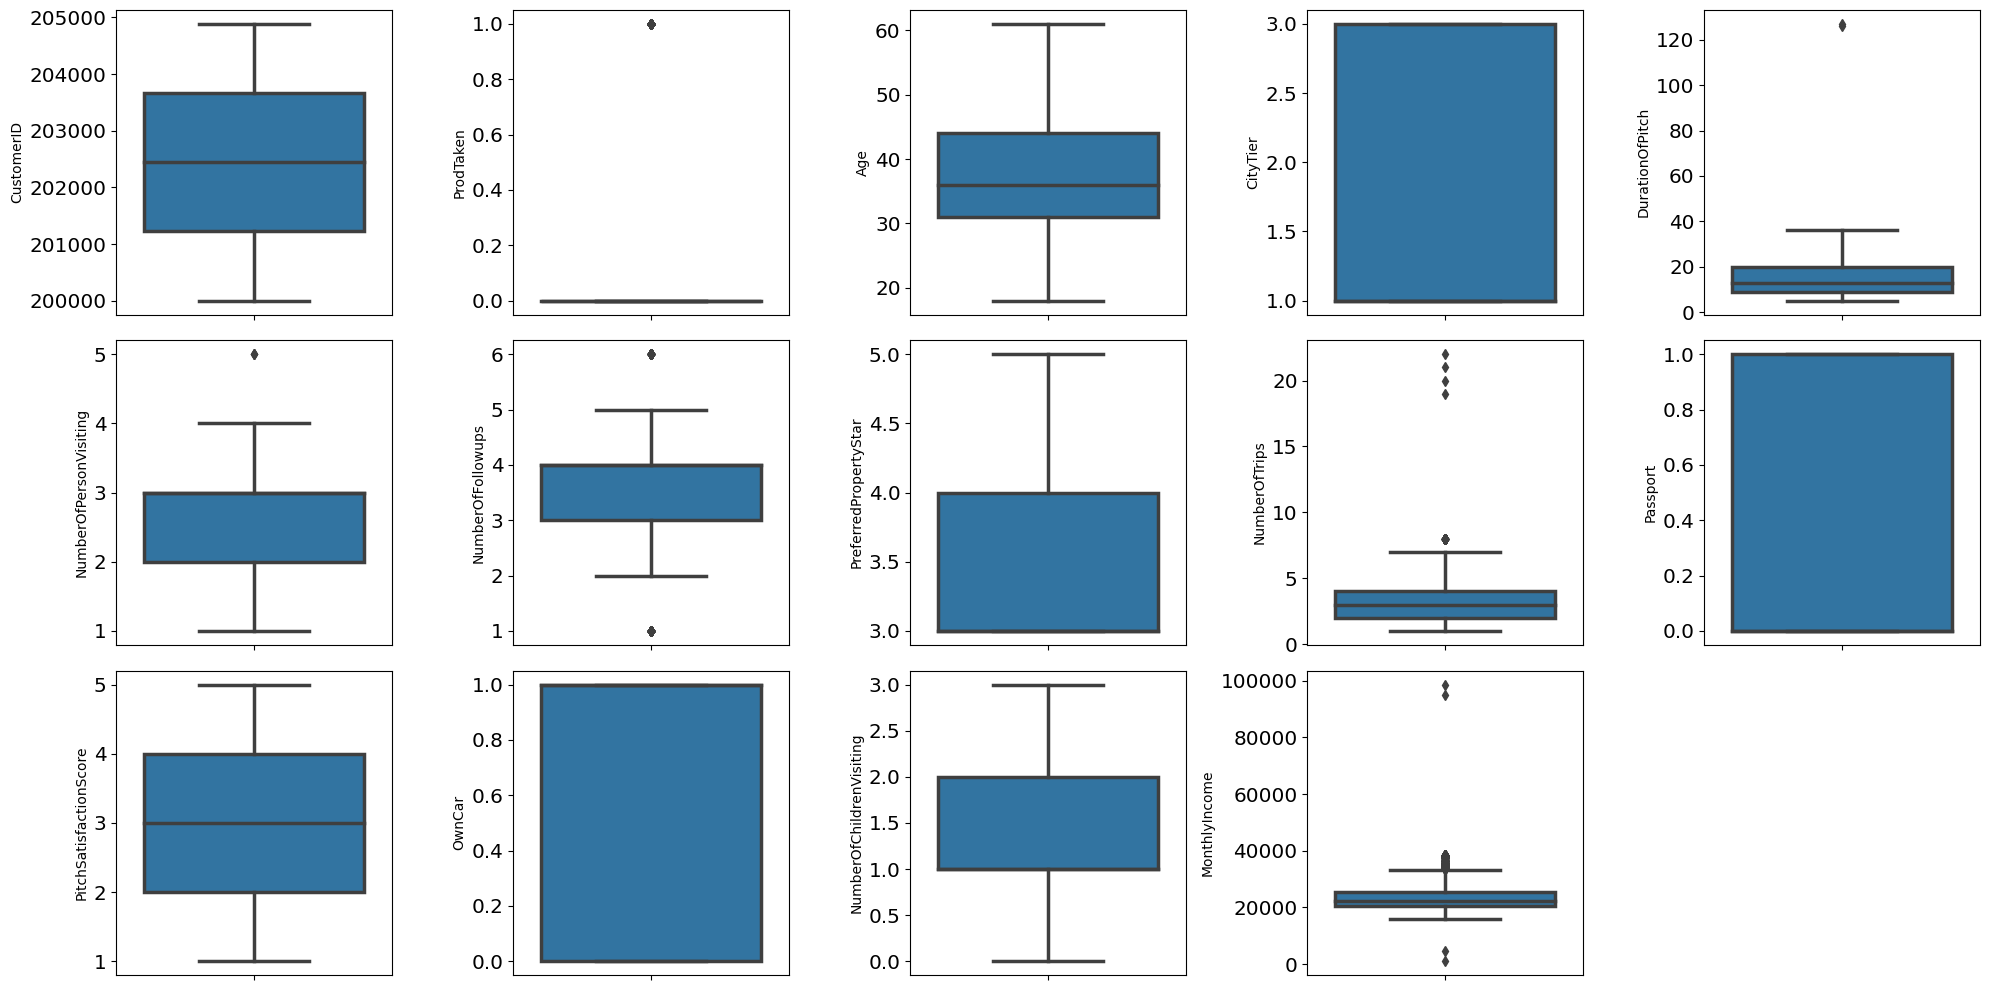

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(3,5,i+1)
  sns.boxplot(y=df[nums[i]],orient='v')
  plt.tight_layout()

Dari plot diatas, didapatkan bahwa:
- Pada fitur `ProdTaken` `DurationOfPitch` `NumberOfPersonVisiting` terdapat 1 outlier
- pada fitur `NumberOfFollowups` terdapat 2 outlier
- pada fitur `NumberOfTrips` terdapat 5 outlier
- pada fitur `MonthlyIncome` terdapat 4 outlier

Terdapat beberapa fitur diatas yang memiliki outlier, maka disarankan untuk melakukan transformasi data menggunakan log transform pada tahap pre-processing. Transformasi ini dapat membantu mengurangi dampak outlier pada distribusi data.

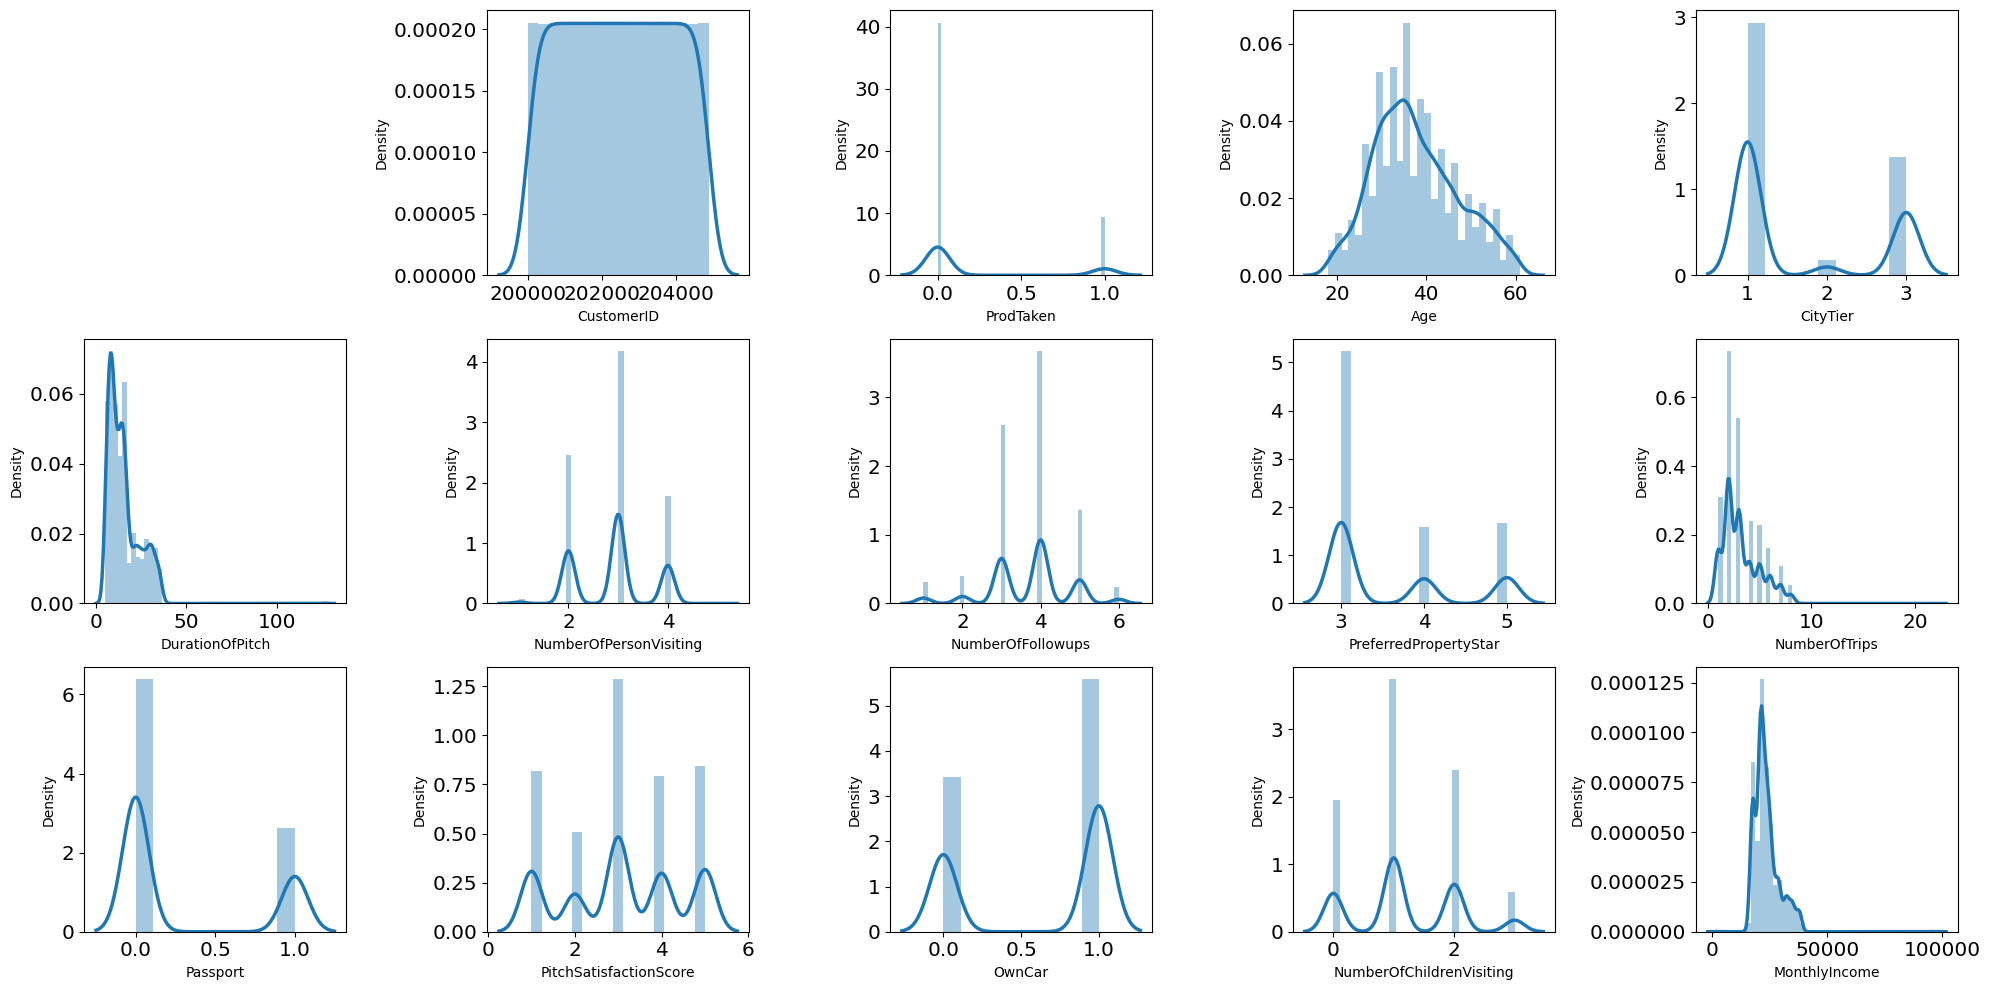

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(3,5,i+2)
  sns.distplot(df[nums[i]])
  plt.tight_layout()

Dari plot diatas, didapatkan bahwa:
- `Age` : Distribusi normal
- `DurationOfPitch` `NumberOfTips` `MonthlyIncome` : Positively Skewed
- `OwnCar` `Passport` `ProdTaken` : Bimodal
- `NumberOfPersonVisiting` `City Tier` `PreferredPropertyStar`: Trimodal

Data dengan positively skewed cenderung memiliki ekor panjang di sebelah kanan distribusi, yang memungkinkan adanya outlier, maka dari itu kita dapat mencoba beberapa transformasi misalnya log transform dan melakukan normalisasi data dengan melakukan Z-Score untuk mengurangi mean dan membaginya dengan standar deviasi. Normalisasi berguna dalam memastikan data yang dimiliki skala nya seragam

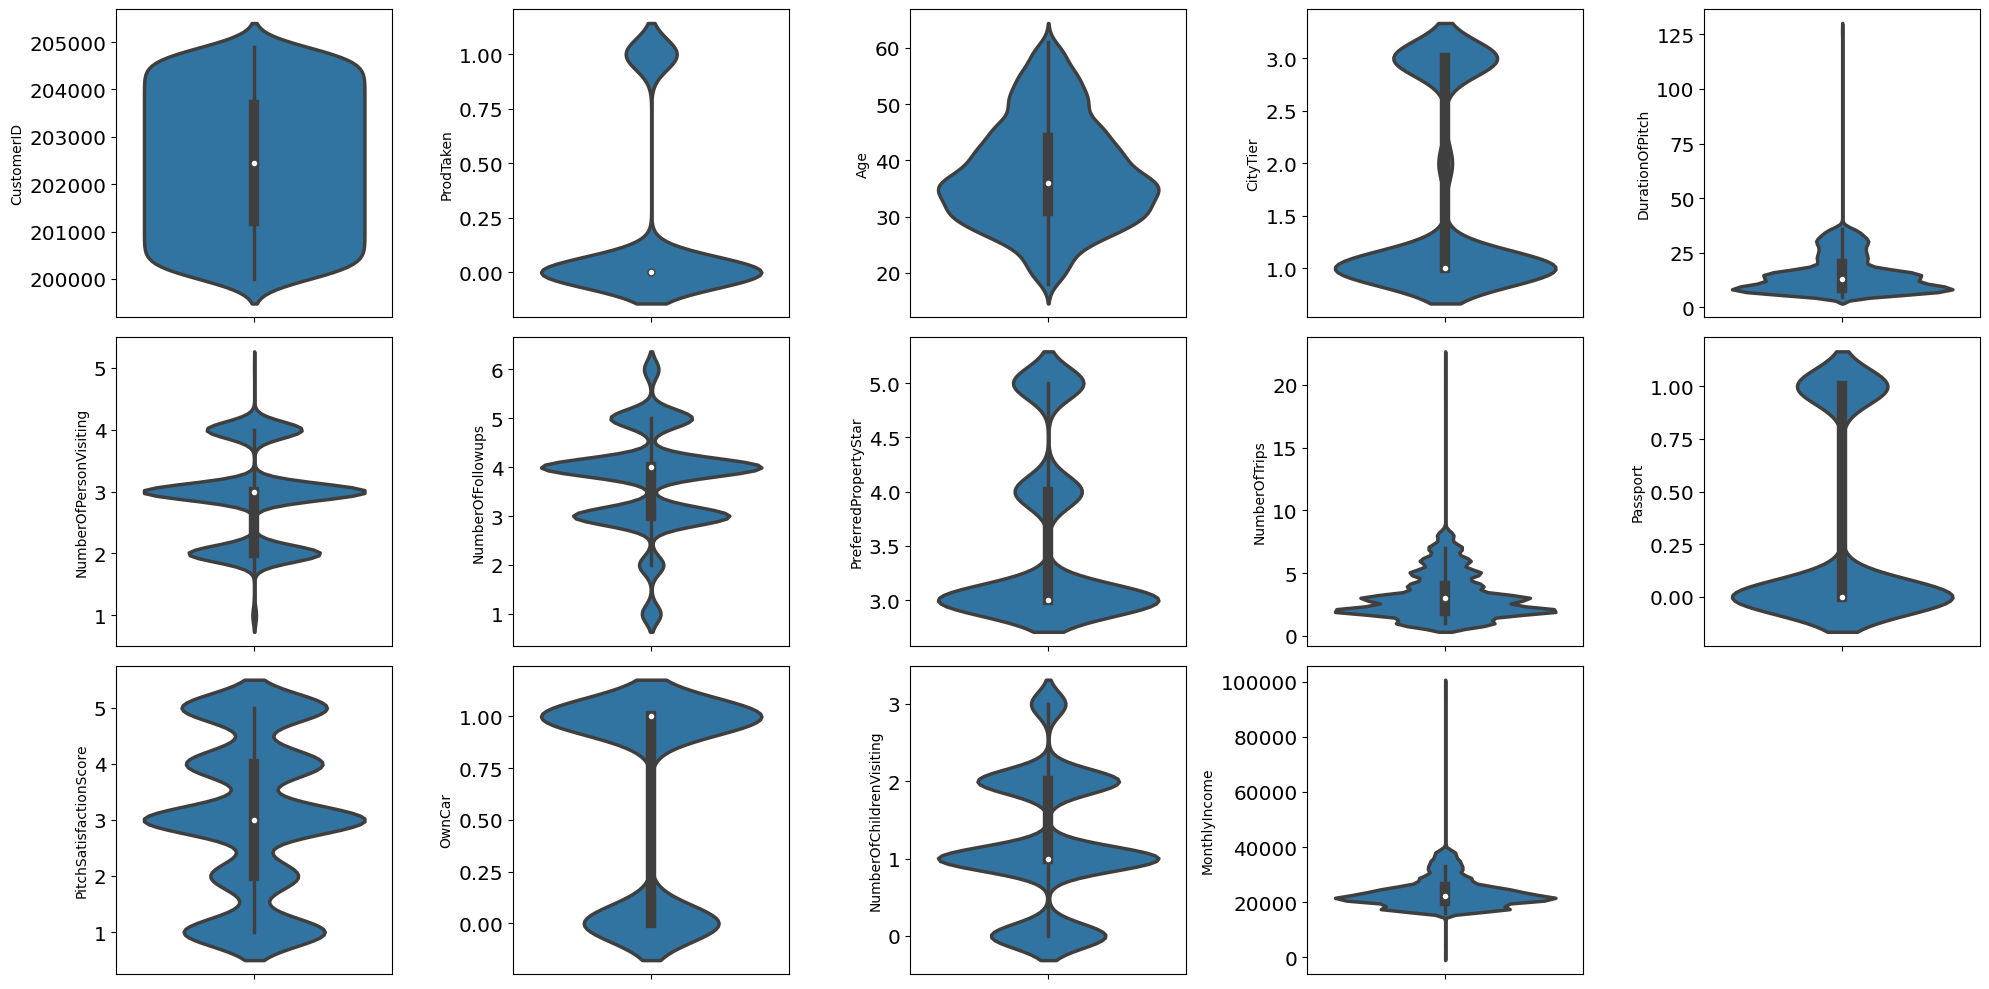

In [ ]:
for i in range(0, len(nums)):
  plt.subplot(3, 5, i+1)
  sns.violinplot(y=df[nums[i]], orient = 'v')
  plt.tight_layout()

Categorical Collumn

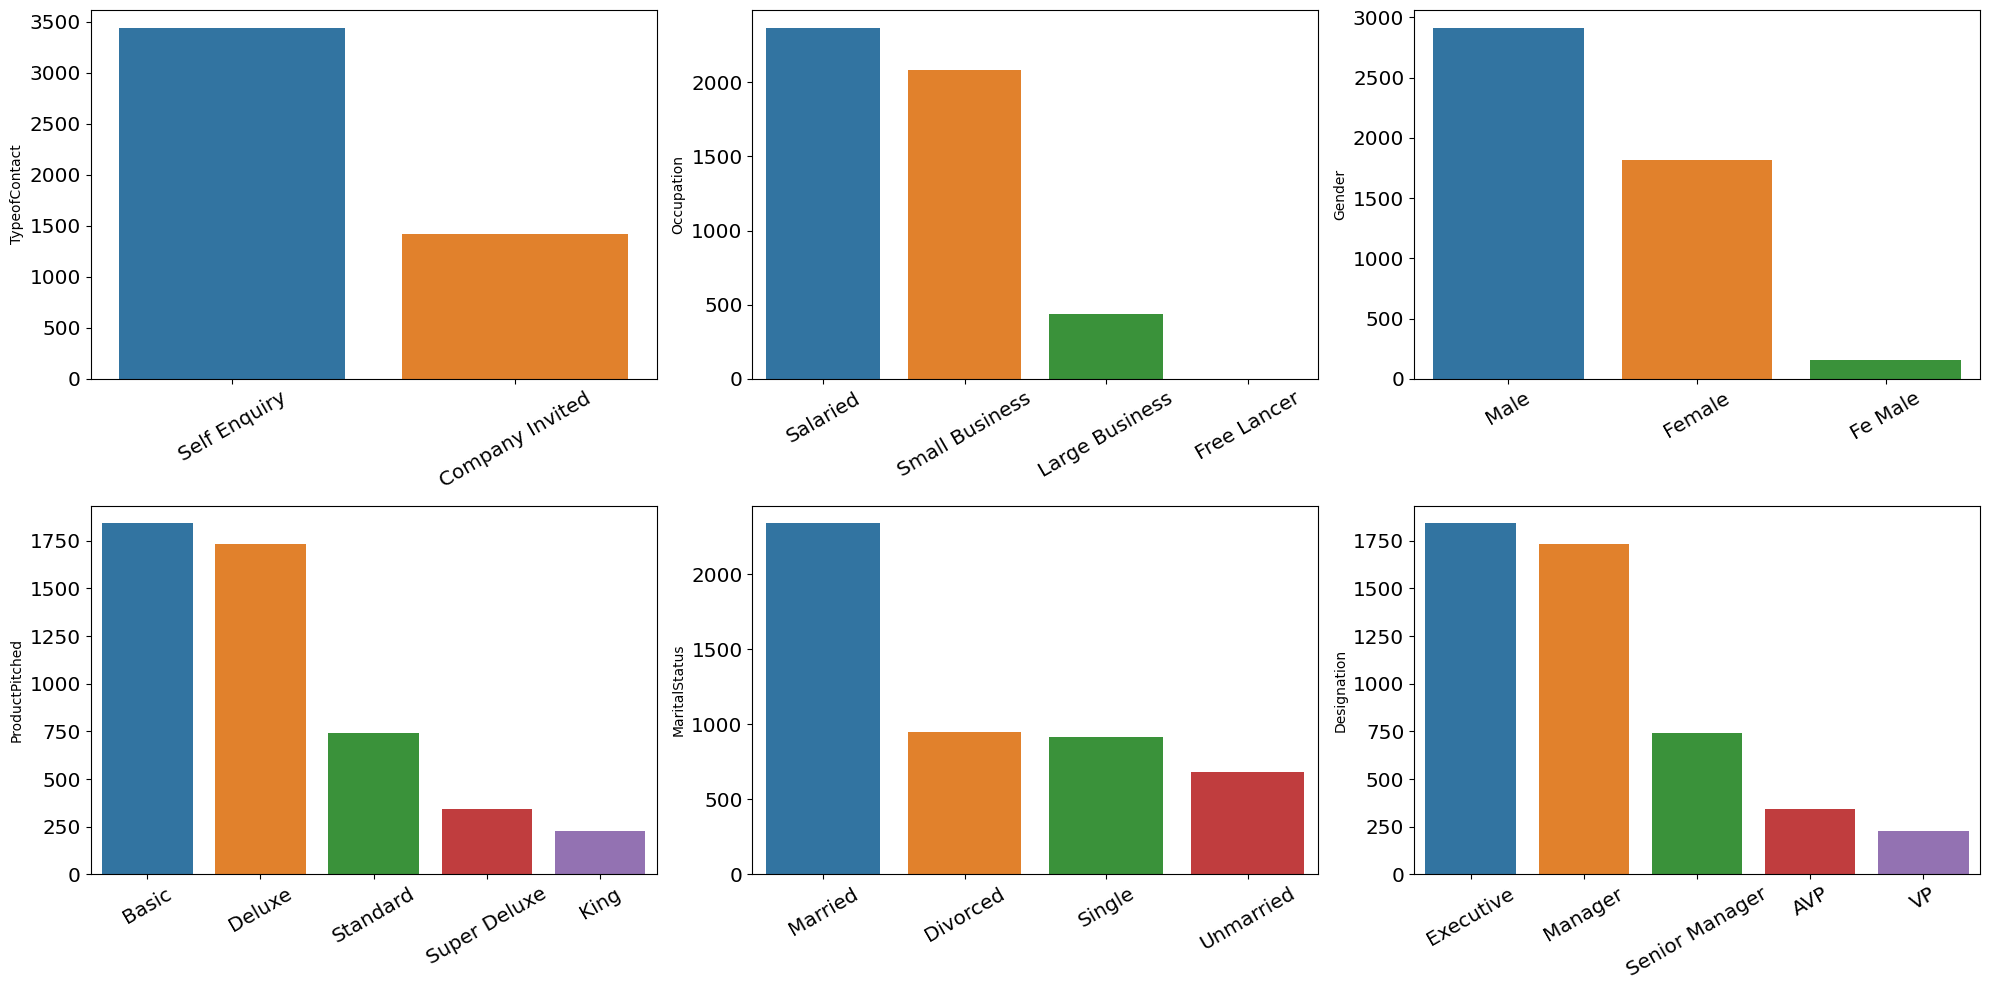

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[cats[i]].value_counts().index, y=df[cats[i]].value_counts())
    plt.xticks(rotation =30)
    plt.tight_layout()

Dari grafik diatas, didapatkan bahwa:
- Pada fitur `Occupation` kategori Free lancer mengalami ketimpangan, hal ini dapat menyebabkan bias dalam interpretasi hasil. Maka sebaiknya kita melakukan transformasi data pada tahap pre-processing.
- pada fitur `MaritalStatus` kategori Unmarried dengan Single dapat diasumsikan sama, sehingga pada proses preprocessing dapat di gabung menjadi 1 kategorik saja.
- terdapat keselahan penulisan pada fitur `Gender`, 'Fe Male' yang menyebabkan terbagi dua-nya value pada 'Female'

### Multivariate Analysis

Correaltion Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
cats = ['CustomerID','ProdTaken', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation']
nums = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']

for cat in cats:
    df[cat] = df[cat].astype("category")

In [ ]:
df.corr()

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
Age,1.000000,-0.012063,-0.002577,0.184905,0.007370,0.464869
DurationOfPitch,-0.012063,1.000000,0.009434,0.009715,0.031408,-0.006252
NumberOfFollowups,-0.002577,0.009434,1.000000,0.139517,0.286425,0.176503
NumberOfTrips,0.184905,0.009715,0.139517,1.000000,0.168795,0.139105
NumberOfChildrenVisiting,0.007370,0.031408,0.286425,0.168795,1.000000,0.201643
MonthlyIncome,0.464869,-0.006252,0.176503,0.139105,0.201643,1.000000


<Axes: >

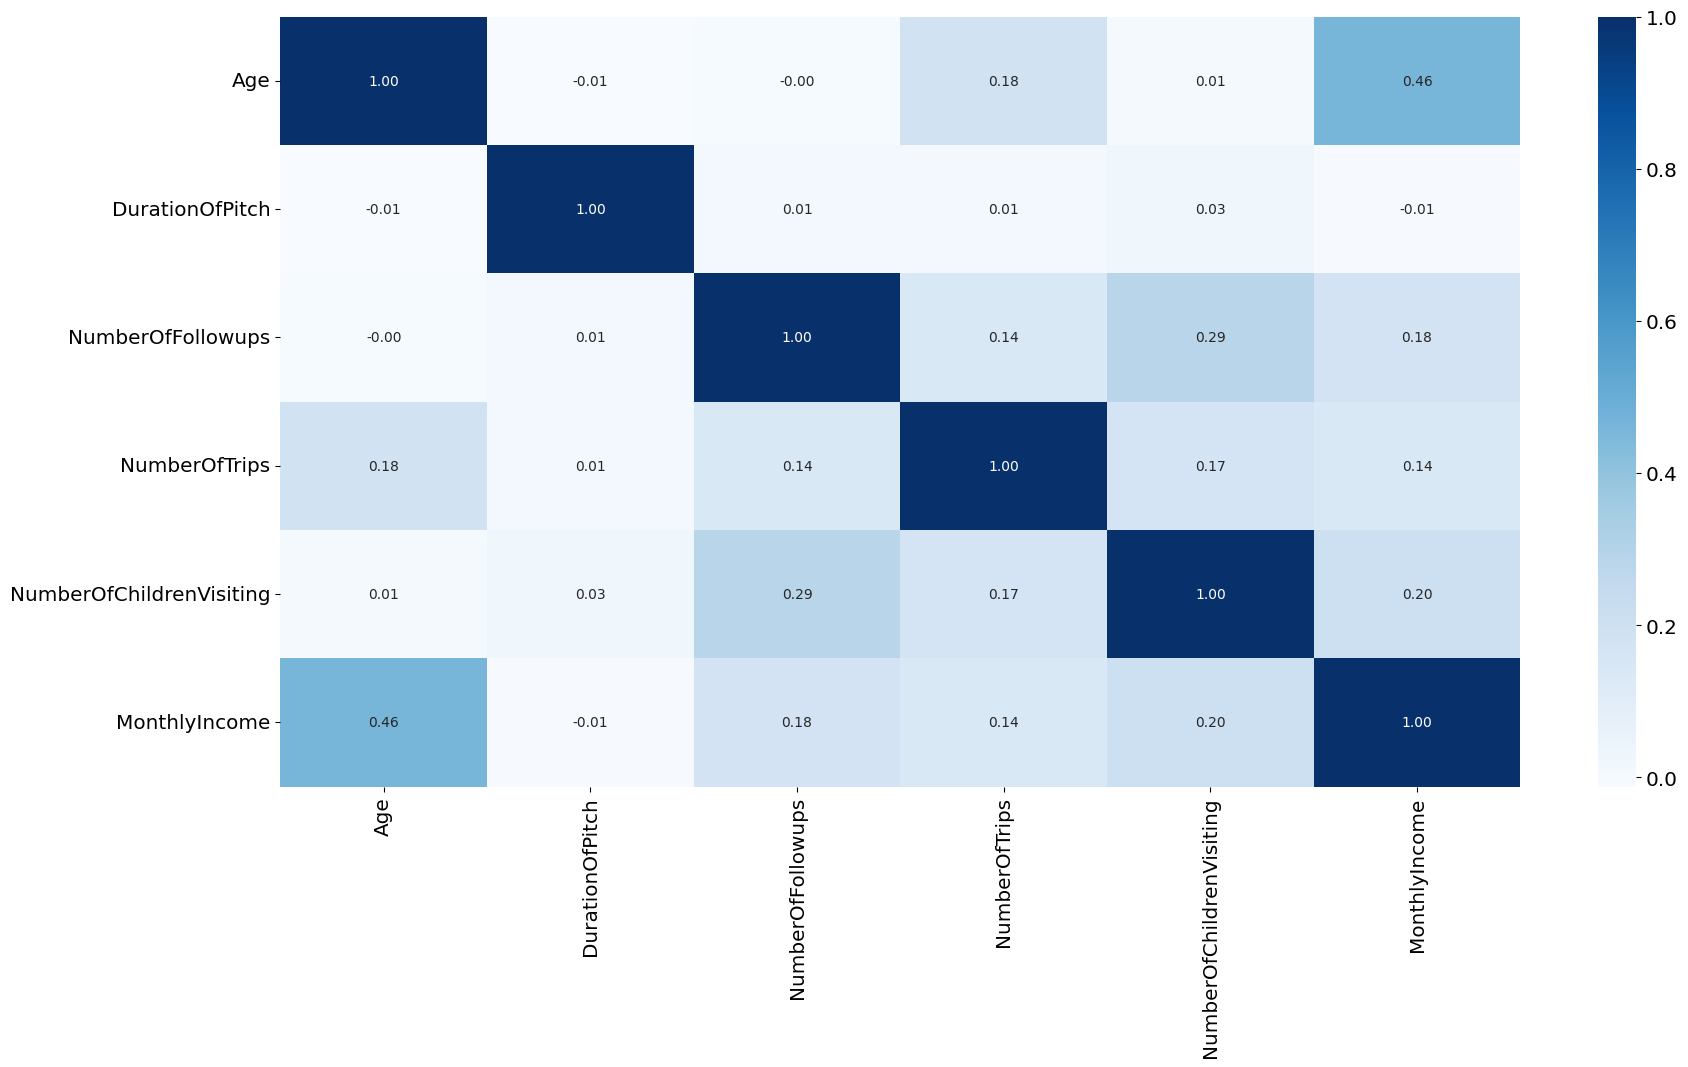

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari grafik diatas, didapatkan bahwa:

- Kolom `Age` dengan `DurationOfPitch` dan `NumberOfFollowups` memiliki korelasi negatif lemah

- Kolom `Age` memiliki nilai korelasi positif tinggi (mendekati 0.7), nantinya dapat digabung menjadi fitur baru

- Kolom `MonthlyIncome` memiliki korelasi negatif lemah terhadap kolom `DurationOfPitch`

Selain Fitur diatas, menunjukkan tidak adanya korelasi antar fitur lainnya.

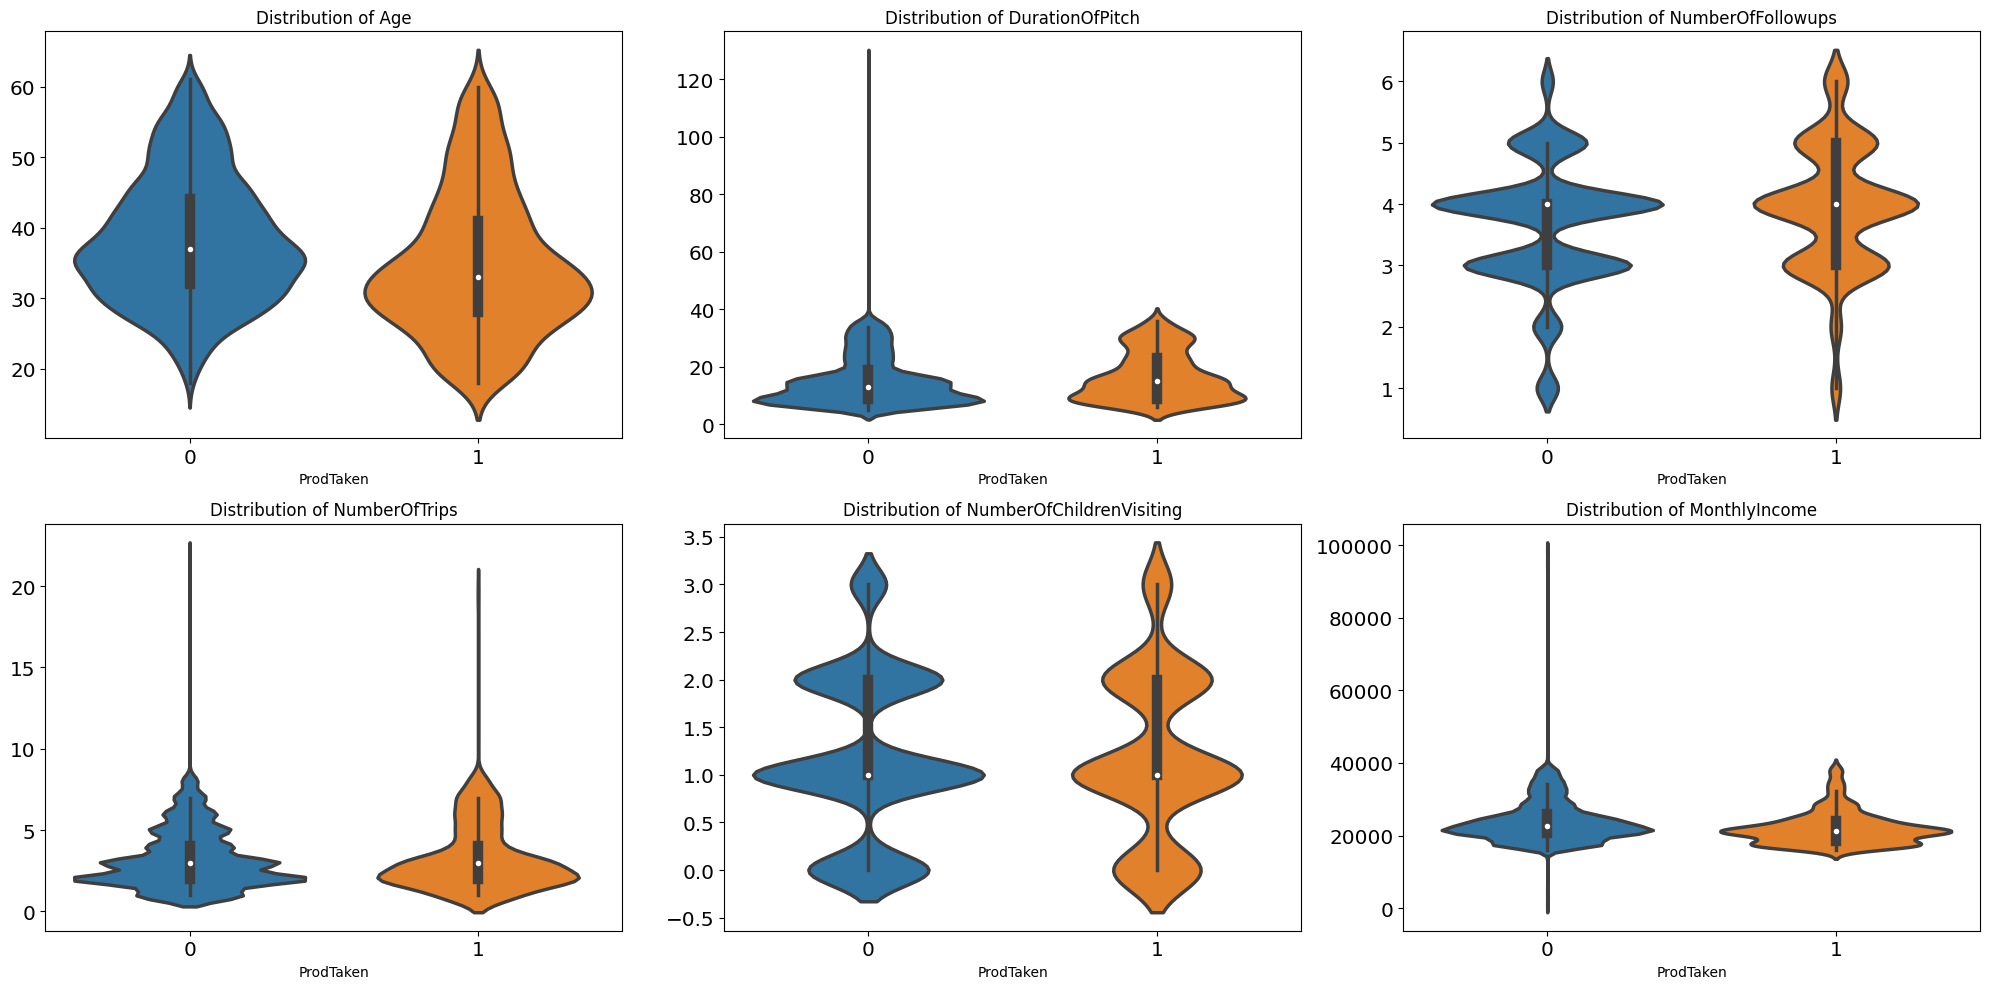

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, col in enumerate(nums):
  ax = axes.flatten()[i]
  sns.violinplot(data = df, x =df['ProdTaken'], y=col,ax = ax)
  ax.set_title(f'Distribution of {col}', fontsize=12)
  ax.set_ylabel('')
  plt.tight_layout()

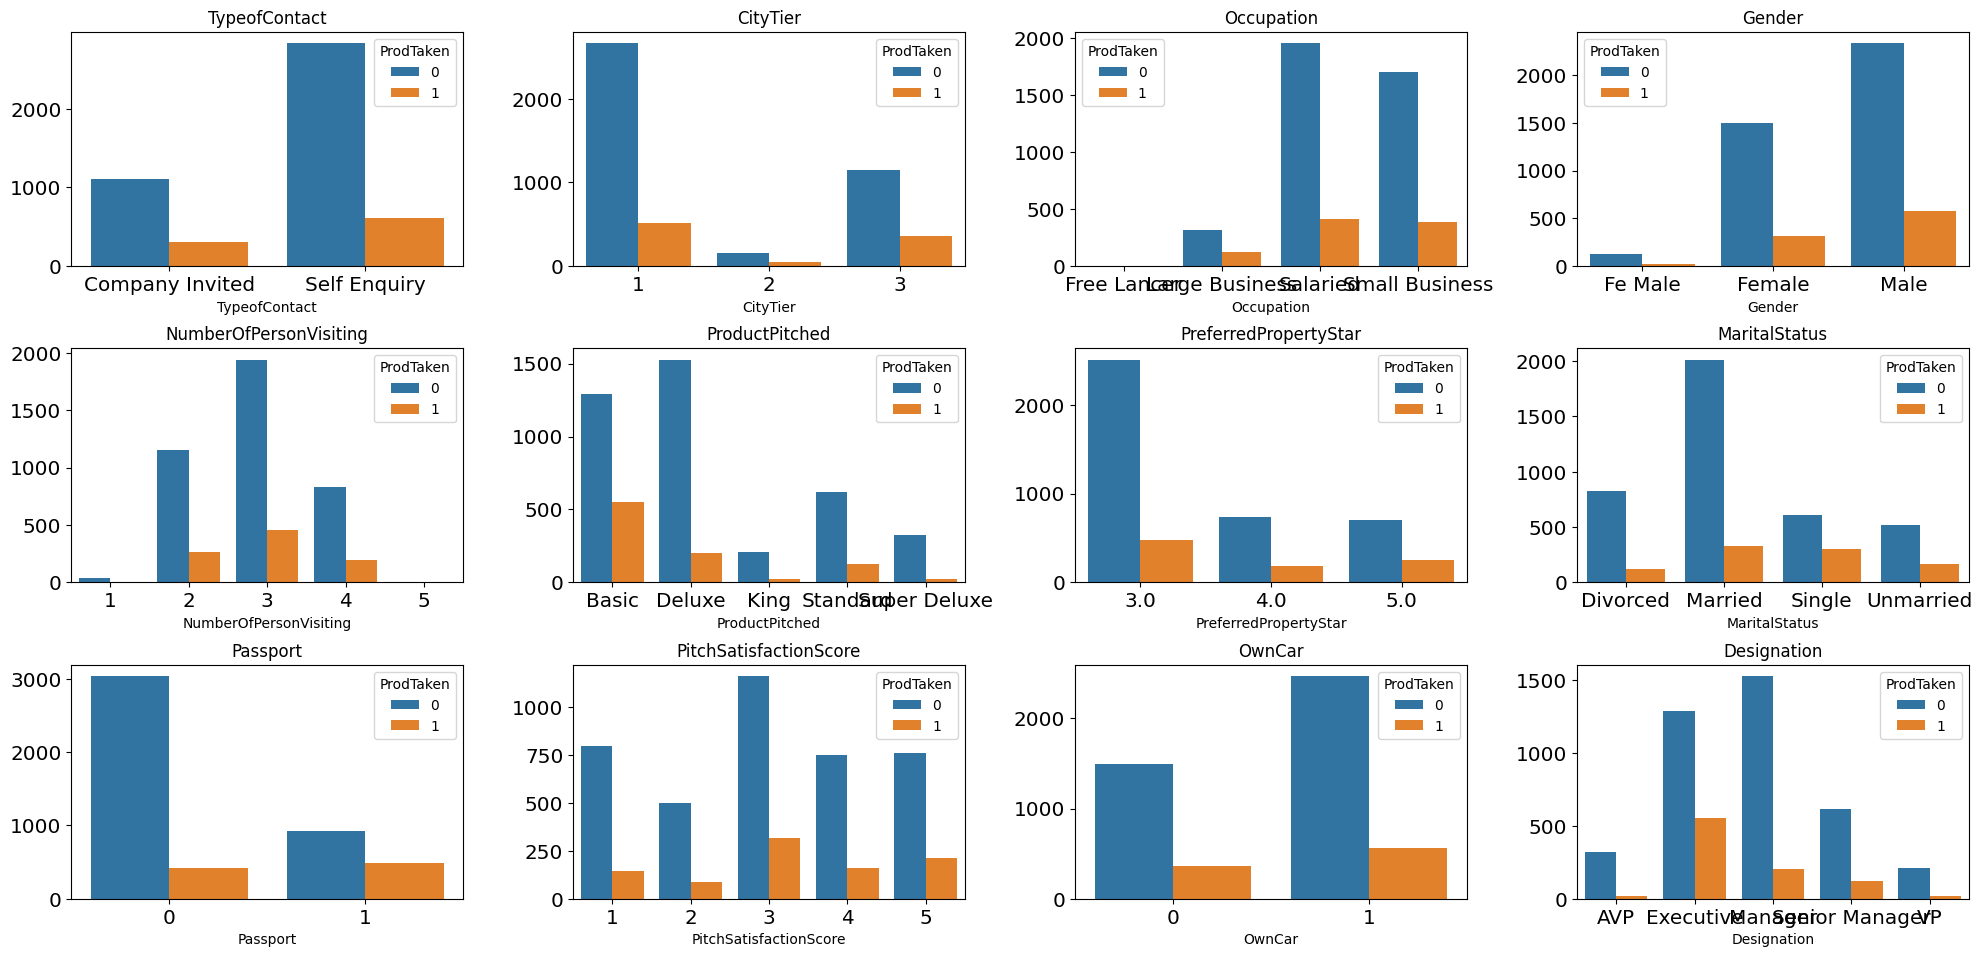

In [ ]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
for i, col in enumerate(cats[2:]):
    ax = axes.flatten()[i]
    sns.countplot(data=df, x=col, hue='ProdTaken', ax=ax)
    ax.set_title(f'{col}', fontsize=12)
    ax.set_ylabel('')
fig.tight_layout()
fig.subplots_adjust(top=0.93)

## **Data Cleansing (simple)**


In [ ]:
df_simp = df.copy()
df_simp

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


### Handling Missing Values

In [ ]:
# Handling Missing Values

## Age --> Mean
age_mean = df_simp['Age'].mean()
df_simp['Age'] = df_simp['Age'].replace({np.nan: age_mean})

## TypeOfContact --> Self Enquiry
df_simp['TypeofContact'].fillna('Self Enquiry', inplace=True)

## DurationOfPtch --> Median
dop_median = df_simp['DurationOfPitch'].median()
df_simp['DurationOfPitch'] = df_simp['DurationOfPitch'].replace({np.nan: dop_median})

## NumberOfFollowups --> Median
NOF_median = df_simp['NumberOfFollowups'].median()
df_simp['NumberOfFollowups'] = df_simp['NumberOfFollowups'].replace({np.nan: NOF_median})

## PrefferedPropertyStar --> 4
df_simp['PreferredPropertyStar'].fillna(4, inplace=True)

## NumberOfTrips --> Median
NOT_median = df_simp['NumberOfTrips'].median()
df_simp['NumberOfTrips'] = df_simp['NumberOfTrips'].replace({np.nan: NOT_median})

## NumberOfChildren --> Modus
NCV_mode = df_simp['NumberOfChildrenVisiting'].mode()[0]
df_simp['NumberOfChildrenVisiting'] = df_simp['NumberOfChildrenVisiting'].replace({np.nan: NCV_mode})

## MonthlyIncome --> Median
MonthlyIncome_median = df_simp['MonthlyIncome'].median()
df_simp['MonthlyIncome'] = df_simp['MonthlyIncome'].replace({np.nan: MonthlyIncome_median})

print("Jumlah nilai kosong:")
print(df_simp.isnull().sum())

Jumlah nilai kosong:
CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


### Handling Incosistent Data

In [ ]:
# Handling Inconsistent data

## Fe Male --> Female
df_simp['Gender'] = df_simp['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

## Single --> Unmarried
df_simp['MaritalStatus'] = df_simp['MaritalStatus'].apply(lambda x: 'Unmarried' if x == 'Single' else x)

## type Age --> integer (menghindari koma pada umur)
df_simp['Age'] = df_simp['Age'].astype('int')

### Handling Duplicate Data

In [ ]:
# Handling Duplicate Data
## drop CustomerID
df_simp.drop('CustomerID', axis=1, inplace = True)
#print(f'''Jumlah data duplikat di dalam dataset : {df_simp.duplicated().sum()}''')

# **Business Insight**

In [ ]:
df_bi = df_simp.copy()

## Conversion Rate on Gender

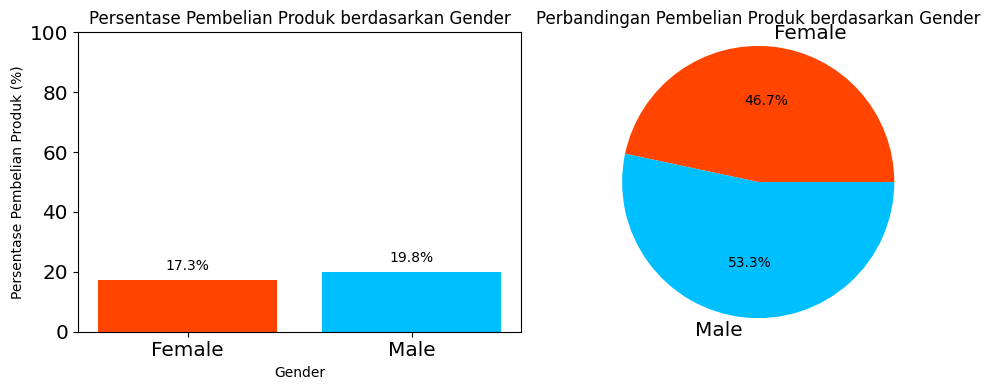

In [ ]:
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']

Percentage_Purchase_Gender = (df_bi.groupby('Gender')['ProdTaken'].mean()) * 100

labels = Percentage_Purchase_Gender.index
sizes = Percentage_Purchase_Gender.values

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Gender")
plt.ylabel("Persentase Pembelian Produk (%)")
plt.title("Persentase Pembelian Produk berdasarkan Gender")
plt.ylim(0.0, 100.0)

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)
plt.title("Perbandingan Pembelian Produk berdasarkan Gender")
plt.axis('equal')

plt.tight_layout()
plt.show()

Jika dibandingkan berdasarkan gender maka dapat dilihat bahwa Male lebih cenderung membeli produk tersebut dibandingkan dengan female. Lebih lanjut **Male memiliki porsi sebesar 53,3% diatas female yang memiliki 46,7%**

## Conversion Rate on Type of Contact

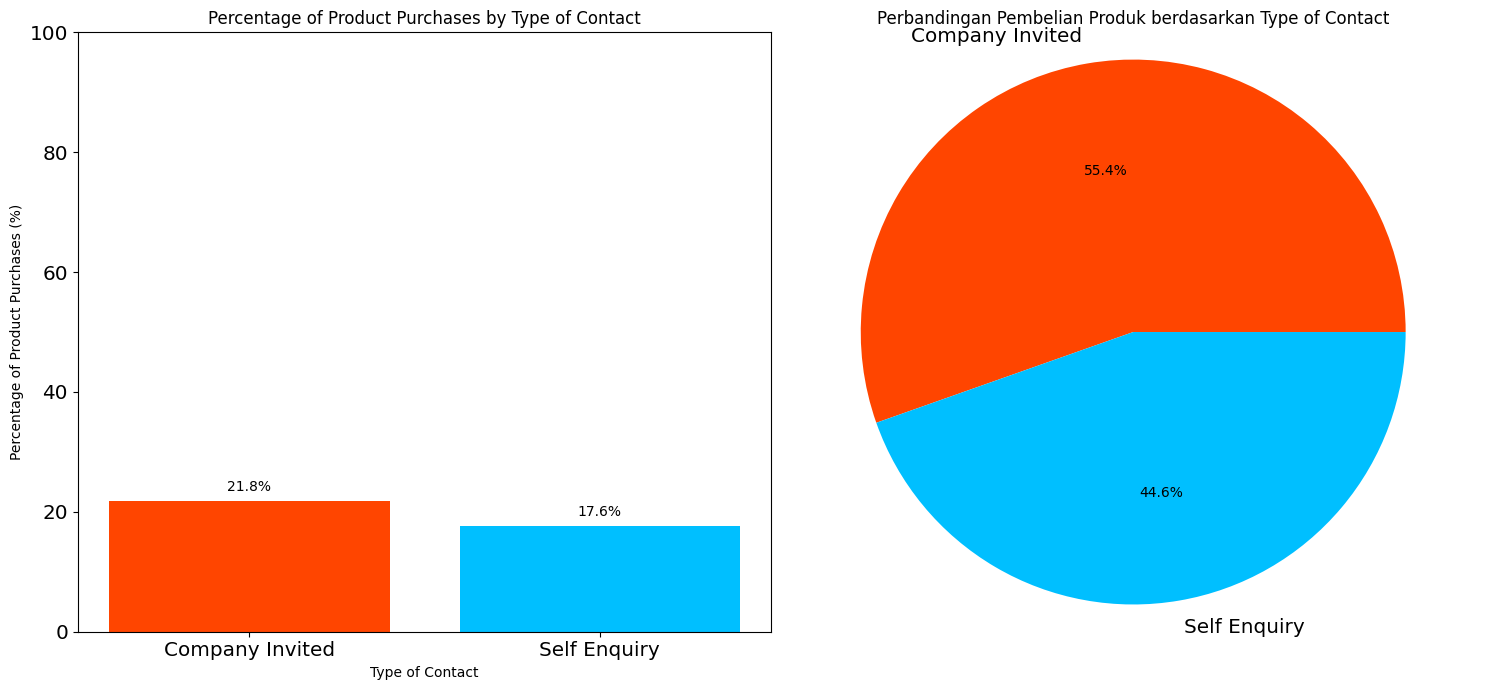

In [ ]:
Percentage_Purchase_ToC = df_bi.groupby('TypeofContact')['ProdTaken'].mean()*100

labels = Percentage_Purchase_ToC.index
sizes = Percentage_Purchase_ToC.values

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Type of Contact")
plt.ylabel("Percentage of Product Purchases (%)")
plt.title("Percentage of Product Purchases by Type of Contact")
plt.ylim(0.0, 100.0)

plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = colors)
plt.title("Perbandingan Pembelian Produk berdasarkan Type of Contact")
plt.axis('equal')

plt.tight_layout()
plt.show()

Jika dibandingkan berdasarkan Type of Contact maka dapat dilihat bahwa Company Invited lebih banyak membeli produk tersebut dibanding self inquiry. **Company invited memiliki porsi sebesar 54,7% diatas Self Enquiry yang memiliki 45,3%**

## Conversion Rate on Occupation

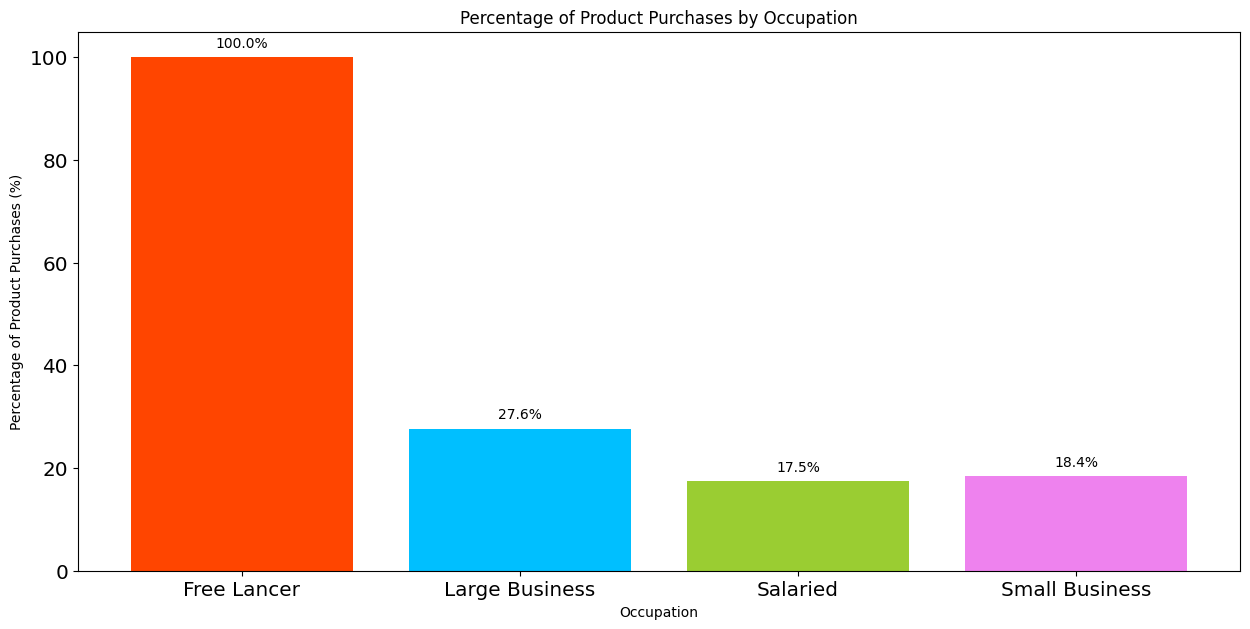

In [ ]:
Percentage_Purchase_Occupation = df_bi.groupby('Occupation')['ProdTaken'].mean()*100


labels = Percentage_Purchase_Occupation.index
sizes = Percentage_Purchase_Occupation.values

plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color = colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

plt.xlabel("Occupation")
plt.ylabel("Percentage of Product Purchases (%)")
plt.title("Percentage of Product Purchases by Occupation")



plt.show()

Jika dibandingkan berdasarkan Occupation maka dapat dilihat bahwa Free Lancer memiliki 100% product purchase, jauh diatas dibandingkan dengan Large Business, Salaried dan Small Business. Free Lancer sendiri memiliki pangsa pasar sebesar 61.1% lebih besar dari pangsa pasar gabungan Large Business, Salaried dan Small Business.

## Conversion Rate on Age

In [ ]:
## menentukan Min dan Mx dari usia
age_min = df_bi['Age'].min()
age_max = df_bi['Age'].max()

## lebar dari klasifikasinya
lebar = (age_max - age_min) / 4

## Fungsi untuk pengelompokkan umur
def age_cats(age):
    if age <= age_min + lebar:
        return "18-29"
    elif age <= age_min + 2 * lebar:
        return "30-41"
    elif age <= age_min + 3 * lebar:
        return "42-53"
    else:
        return "54-61"

df_bi['class_age'] = df_bi['Age'].apply(age_cats)

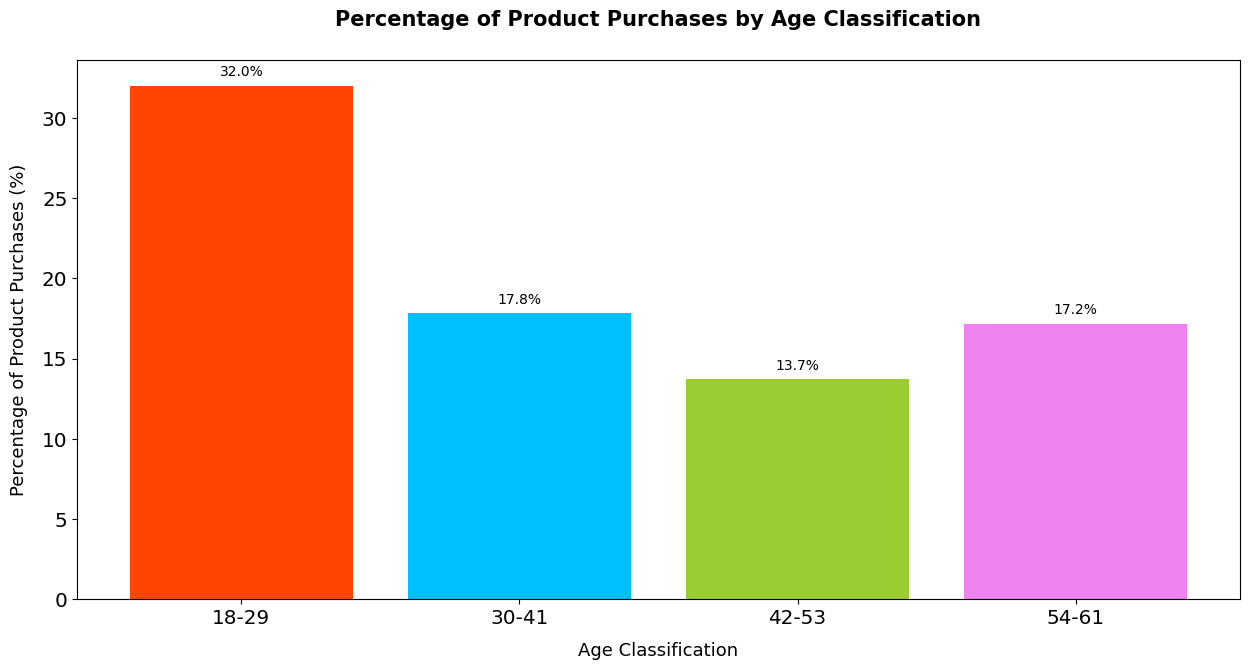

In [ ]:
Percentage_Purchase_age = df_bi.groupby('class_age')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_age.index
sizes = Percentage_Purchase_age.values

plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

#set labels
plt.xlabel('Age Classification', fontsize=13, labelpad=10)
plt.ylabel('Percentage of Product Purchases (%)', fontsize=13, labelpad=10)
plt.title('Percentage of Product Purchases by Age Classification',
             fontsize=15, fontweight='bold', pad=25)


plt.show()


kelompok usia yang memiliki presentase terbesar untuk mengambil produk setelah pitch produk oleh sales adalah kelompok usia 18-29 tahun (32.1%). "Travel&Trips.com" dapat lelbih berfokus pada kelompok usia ini untuk pitch product terbaru mereka untuk merendahkan cost marketing.

## Conversion Rate on Monthly Income

In [ ]:
df_mi = df_bi[df_bi['MonthlyIncome']<90000]
MonthlyIncome = df_bi[df_bi['MonthlyIncome']<90000]
## menentukan Min dan Mx dari usia
MI_min = df_mi['MonthlyIncome'].min()
MI_max = df_mi['MonthlyIncome'].max()

## lebar dari klasifikasinya
lebar = (MI_max -MI_min) / 4

def income_segmentation(income):
    if income <= MI_min +  lebar:
        return 'Low'
    elif income <= MI_min + 2*lebar:
        return 'Lower Middle'
    elif income <= MI_min + 3*lebar:
        return 'Upper Middle'
    else:
        return 'High'

df_mi['IncomeSegement'] = df_mi['MonthlyIncome'].apply(income_segmentation)

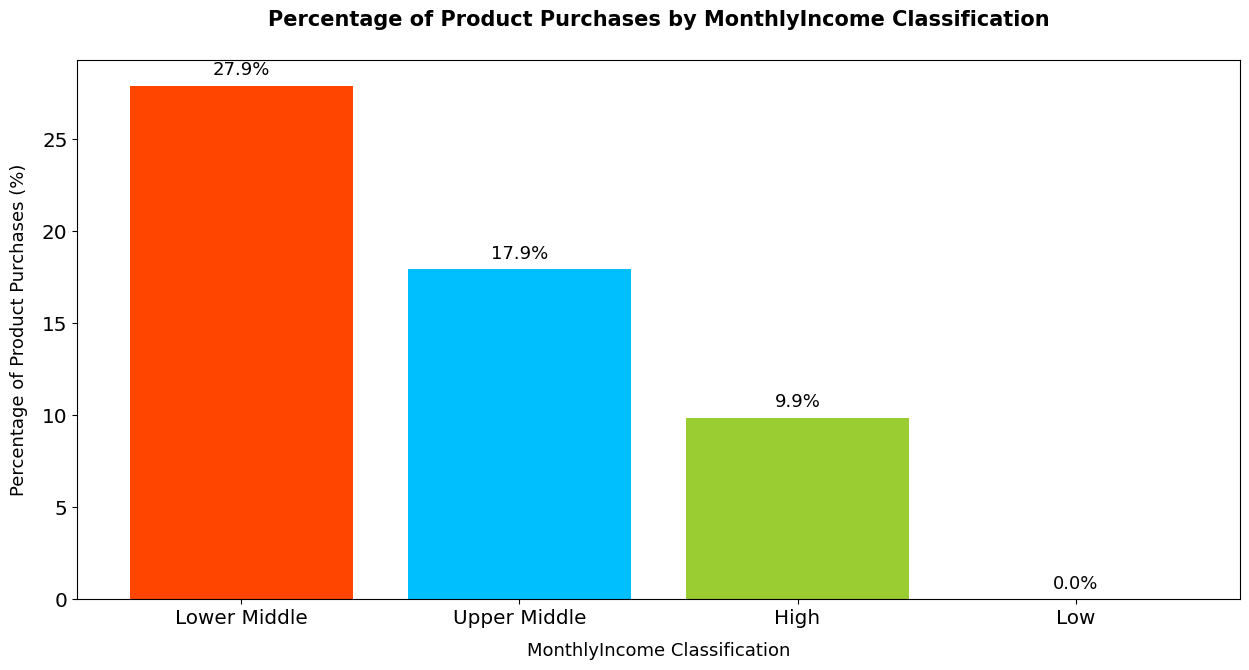

In [ ]:
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']

Percentage_Purchase_MonthlyIncome = df_mi.groupby('IncomeSegement')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_MonthlyIncome.index
sizes = Percentage_Purchase_MonthlyIncome.values

sorted_indices = np.argsort(sizes)[::-1]  # Indeks terurut secara descending
labels = [labels[i] for i in sorted_indices]
sizes = [sizes[i] for i in sorted_indices]
plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=13)

#set labels
plt.xlabel('MonthlyIncome Classification', fontsize=13, labelpad=10)
plt.ylabel('Percentage of Product Purchases (%)', fontsize=13, labelpad=10)
plt.title('Percentage of Product Purchases by MonthlyIncome Classification',
             fontsize=15, fontweight='bold', pad=25)

plt.show()


## Conversion Rate on Duration of Pitch

In [ ]:
## menentukan Min dan Mx dari DOP
DOP_min = df_bi['DurationOfPitch'].min()
DOP_max = df_bi['DurationOfPitch'].max()

## lebar dari klasifikasinya
lebar = (DOP_max - DOP_min) / 4


## Fungsi untuk pengelompokkan DOP
def DOP_range(dop):
    if dop <= DOP_min + lebar:
        return "5-13"
    elif dop <= DOP_min + 2 * lebar:
        return "14-21"
    elif dop <= DOP_min + 3 * lebar:
        return "22-29"
    else:
        return "30-36"

df_bi['DOP_range'] = df['DurationOfPitch'].apply(DOP_range)


Text(0.5, 1.0, 'Jumlah Package Terjual Berdasarkan Durasi Pitching')

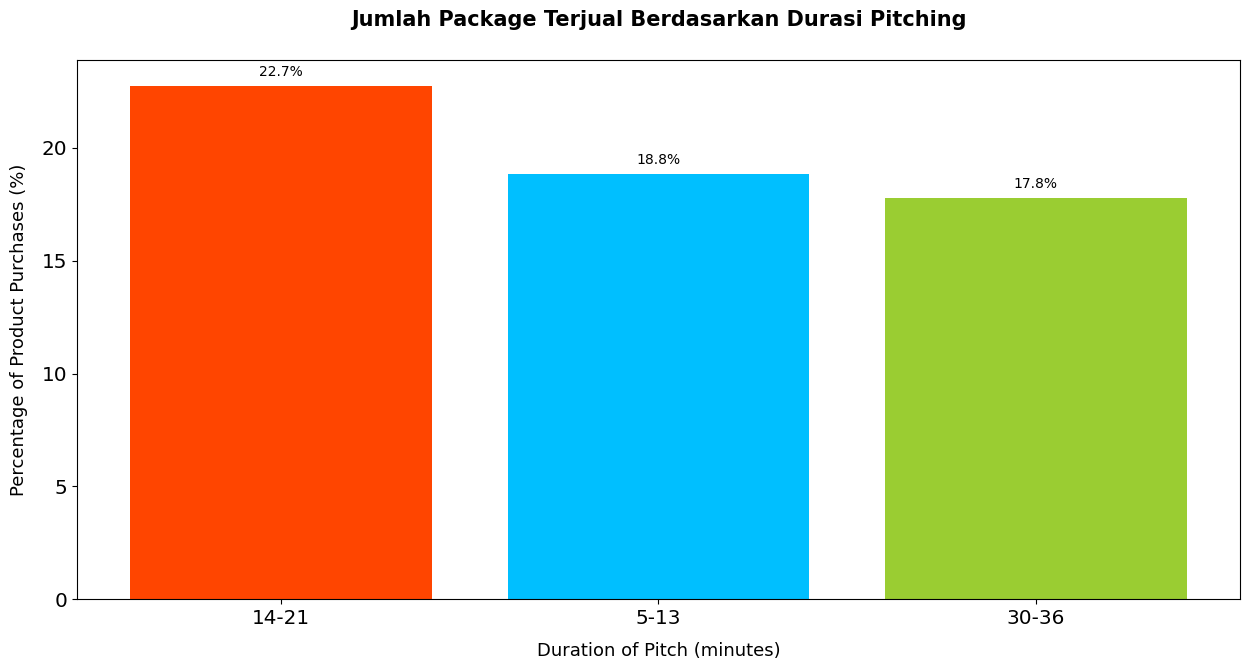

In [ ]:
## buat plot
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']

Percentage_Purchase_DOP = df_bi.groupby('DOP_range')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_DOP.index
sizes = Percentage_Purchase_DOP.values

sorted_indices = np.argsort(sizes)[::-1]  # Indeks terurut secara descending
labels = [labels[i] for i in sorted_indices]
sizes = [sizes[i] for i in sorted_indices]
plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

#set labels
plt.xlabel('Duration of Pitch (minutes)', fontsize=13, labelpad=10)
plt.ylabel('Percentage of Product Purchases (%)', fontsize=13, labelpad=10)
plt.title('Jumlah Package Terjual Berdasarkan Durasi Pitching',
             fontsize=15, fontweight='bold', pad=25)

## Conversion Rate on Preferred Property

In [ ]:
pass_map = {3.0: '3', 4.0: '4',5.0:'5'}
df_bi['PreferredPropertyStar'] = df_bi['PreferredPropertyStar'].map(pass_map)

Text(0.5, 1.0, 'Percentage of Product Purchases by PreferredPropertyStar Classification')

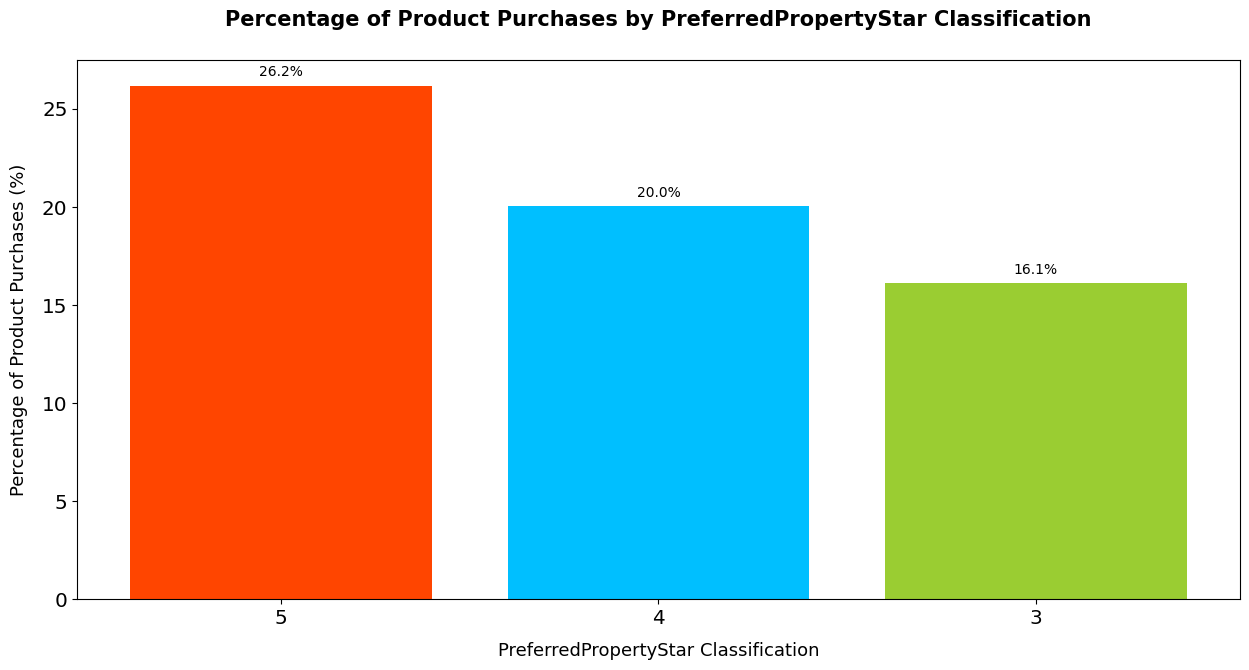

In [ ]:
#PreferredPropertyStar

colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']

Percentage_Purchase_PreferredPropertyStar = df_bi.groupby('PreferredPropertyStar')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_PreferredPropertyStar.index
sizes = Percentage_Purchase_PreferredPropertyStar.values

sorted_indices = np.argsort(sizes)[::-1]  # Indeks terurut secara descending
labels = [labels[i] for i in sorted_indices]
sizes = [sizes[i] for i in sorted_indices]
plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=10)

#set labels
plt.xlabel('PreferredPropertyStar Classification', fontsize=13, labelpad=10)
plt.ylabel('Percentage of Product Purchases (%)', fontsize=13, labelpad=10)
plt.title('Percentage of Product Purchases by PreferredPropertyStar Classification',
             fontsize=15, fontweight='bold', pad=25)

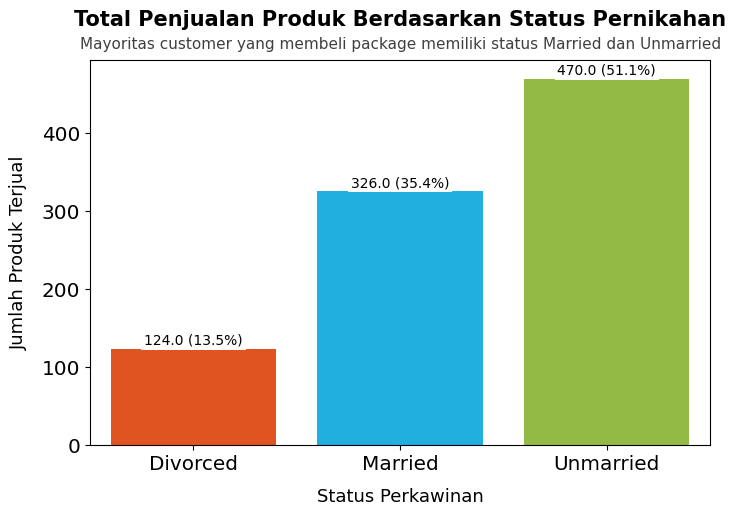

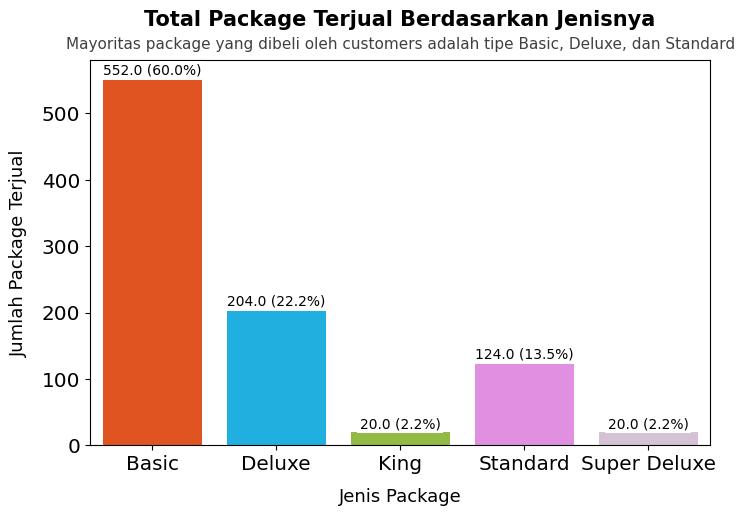

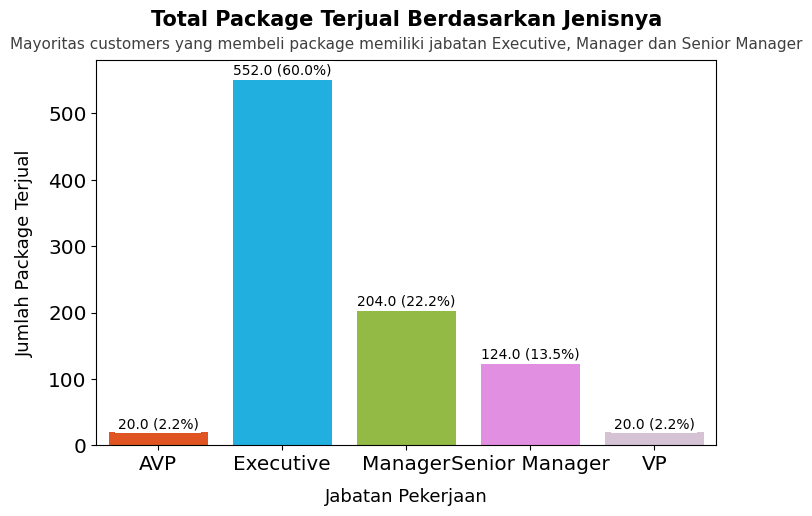

In [ ]:
# ===================================================== Marital Status & Product Taken ========================================================

prodtaken_marital=df_simp.groupby('MaritalStatus').agg({'ProdTaken':'sum'}).reset_index()
sum_prodtaken=sum(df_simp.groupby('MaritalStatus')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']
ax=sns.barplot(x='MaritalStatus',y='ProdTaken',data=prodtaken_marital, palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_prodtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Status Perkawinan', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Produk Terjual', fontsize=13, labelpad=10)
plt.title('Total Penjualan Produk Berdasarkan Status Pernikahan',
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas customer yang membeli package memiliki status Married dan Unmarried'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)

# ===================================================== Product Pitched & Product Taken ========================================================

df_pitchedtaken=df_simp.groupby('ProductPitched').agg({'ProdTaken':'sum'}).reset_index()
sum_pitchedtaken=sum(df_simp.groupby('ProductPitched')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
ax=sns.barplot(x='ProductPitched',y='ProdTaken',data=df_pitchedtaken,palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_pitchedtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Jenis Package', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Package Terjual', fontsize=13, labelpad=10)
plt.title('Total Package Terjual Berdasarkan Jenisnya',
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas package yang dibeli oleh customers adalah tipe Basic, Deluxe, dan Standard'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)

# ===================================================== Designation & Product Taken ========================================================

df_designationtaken=df_simp.groupby('Designation').agg({'ProdTaken':'sum'}).reset_index()
sum_designationtaken=sum(df_simp.groupby('Designation')['ProdTaken'].sum())

#make plots
plt.figure(figsize=(8,5))
ax=sns.barplot(x='Designation',y='ProdTaken', data=df_designationtaken, palette=colors)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/sum_designationtaken)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate('{} ({})'.format(p.get_height(), percentage),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0,1),  # 1 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10,
                bbox=dict(facecolor='white', edgecolor="None", pad=2)
               )
#set labels
plt.xlabel('Jabatan Pekerjaan', fontsize=13, labelpad=10)
plt.ylabel('Jumlah Package Terjual', fontsize=13, labelpad=10)
plt.title('Total Package Terjual Berdasarkan Jenisnya',
             fontsize=15, fontweight='bold', pad=25)

# set info
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = 'Mayoritas customers yang membeli package memiliki jabatan Executive, Manager dan Senior Manager'
ax.text((x_start+x_end)/2, y_end*1.03, desc,
        ha = 'center',fontsize = 11,  alpha = 0.75)
plt.show()

Berdasarkan beberapa grafik di atas, dapat disimpulkan bahwa:
- Package yang ditawarkan oleh perusahaan Travel&Trips.com banyak dibeli oleh customer yang memiliki jabatan sebagai executive, manager dan senior manager, serta customers yang berstatus menikah (Married) dan Tidak Menikah (Unmarried). Tidak ada customer berstatus single yang membeli package yg ditawarkan.
- Package yang paling digemari (Banyak dibeli) oleh customers adalah package Basic, Deluxe, dan Standard

Rekomendasi untuk Bisnis:
- Untuk efisiensi marketing cost, perusahaan Travel&Trips.com bisa melakukan targeted marketing dengan berfokus pada customer/calon customer yang paling potensial untuk membeli package yang ditawarkan, yaitu customer yang memiliki jabatan sebagai executive, manager dan senior manager, serta customers yang berstatus menikah (Married), belum menikah (Single) dan Tidak Menikah (Unmarried) terlebih dahulu sebelum menawarkan kepada customer lain. Hal tersebut dikarenakan data perusahaan menunjukkan bahwa package yang ditawarkan perusahaan hanya sesuai dengan preferensi customer2 tersebut tetapi kurang sesuai dengan customer dengan kriteria lainnya.

## Conversion Rate Passport

In [ ]:
df_bi['Passport']

0       Have
1       None
2       Have
3       Have
4       None
        ... 
4883    Have
4884    Have
4885    None
4886    None
4887    Have
Name: Passport, Length: 4888, dtype: object

In [ ]:
pass_map = {0:'None', 1:'Have'}
df_bi['Passport'] = df_bi['Passport'].map(pass_map)


Text(0.5, 1.0, 'Percentage of Product Purchases by Passport')

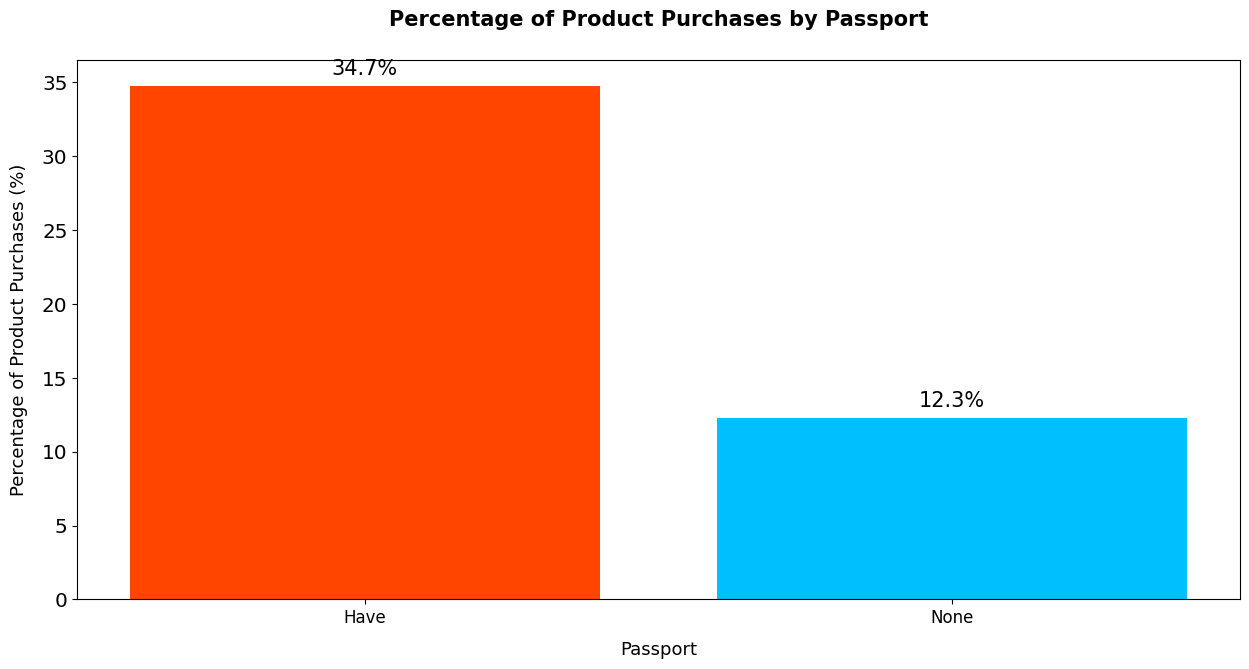

In [ ]:
colors = ['orangered', 'deepskyblue', 'yellowgreen', 'violet', 'thistle']



Percentage_Purchase_passport = df_bi.groupby('Passport')['ProdTaken'].mean() * 100

labels = Percentage_Purchase_passport.index
sizes = Percentage_Purchase_passport.values

sorted_indices = np.argsort(sizes)[::-1]  # Indeks terurut secara descending
labels = [labels[i] for i in sorted_indices]
sizes = [sizes[i] for i in sorted_indices]
plt.figure(figsize=(15, 7))

ax = plt.bar(labels, sizes, color=colors)
for p in ax:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(percentage,
                 xy=(x, y),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=15)

#set labels
plt.xlabel('Passport', fontsize=13, labelpad=10)
plt.ylabel('Percentage of Product Purchases (%)', fontsize=13, labelpad=10)
plt.xticks(fontsize = 12)
plt.title('Percentage of Product Purchases by Passport',
             fontsize=15, fontweight='bold', pad=25)


#Data Prepocessing

`df_simp` akan dipakai utnuk melanjutkan Data Preprocessing (cleansing data) yang telah dilakukan sebelum Business Insight

## Feature Encoding

In [ ]:
#memisahkan data categorical
cat_dtypes = ['object', 'category']
cat_df_simp = df_simp.select_dtypes(include = cat_dtypes)
cats = cat_df_simp.columns

print(cats)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


In [ ]:
#memisahkan data numerical
num_dtypes = ['int64', 'float64']
num_df_simp = df_simp.select_dtypes(include = num_dtypes)
nums = num_df_simp.columns

print(nums)

Index(['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_simp[col].value_counts())
    print('--------------------------------')
    print()

Value count kolom ProdTaken:
0    3960
1     918
Name: ProdTaken, dtype: int64
--------------------------------

Value count kolom TypeofContact:
Self Enquiry       3465
Company Invited    1413
Name: TypeofContact, dtype: int64
--------------------------------

Value count kolom CityTier:
1    3182
3    1498
2     198
Name: CityTier, dtype: int64
--------------------------------

Value count kolom Occupation:
Salaried          2362
Small Business    2084
Large Business     430
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------

Value count kolom Gender:
Male      2910
Female    1968
Name: Gender, dtype: int64
--------------------------------

Value count kolom NumberOfPersonVisiting:
3    2397
2    1414
4    1025
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------

Value count kolom ProductPitched:
Basic           1836
Deluxe          1728
Standard         742
Super Deluxe     342
King             230
Name:

In [ ]:
#Handling Encoding TypeOfContact
mapping_TypeofContact = {
    'Self Enquiry':0,
    'Company Invited':1
}
df_simp['TypeofContact'] = df_simp['TypeofContact'].map(mapping_TypeofContact)

#Handling Encoding Gender
mapping_Gender = {
    'Male':0,
    'Female':1
}
df_simp['Gender'] = df_simp['Gender'].map(mapping_Gender)

#Handling Encoding ProductPitched
mapping_ProductPitched = {
    'Standard':0,
    'Basic':1,
    'Deluxe':2,
    'Super Deluxe':3,
    'King':4
}
df_simp['ProductPitched'] = df_simp['ProductPitched'].map(mapping_ProductPitched)

#Handling Encoding Designation
mapping_Designation = {
    'Manager':0,
    'Senior Manager':1,
    'Executive':2,
    'AVP':3,
    'VP':4
}
df_simp['Designation'] = df_simp['Designation'].map(mapping_Designation)


In [ ]:
OHE1 = pd.get_dummies(df_simp['Occupation'], prefix='work')
OHE1

,work_Free Lancer,work_Large Business,work_Salaried,work_Small Business
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
4883,0,0,0,1
4884,0,0,1,0
4885,0,0,1,0
4886,0,0,0,1


In [ ]:
OHE2 = pd.get_dummies(df_simp['MaritalStatus'], prefix='status')
OHE2

,status_Divorced,status_Married,status_Unmarried
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
4883,0,0,1
4884,0,0,1
4885,0,1,0
4886,0,0,1


In [ ]:
df_simp2 = OHE1.join(df_simp)
df_simp2

,work_Free Lancer,work_Large Business,work_Salaried,work_Small Business,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,0,1,0,1,41,0,3,6.0,Salaried,...,2,3.0,Unmarried,1.0,1,2,1,0.0,0,20993.0
1,0,0,1,0,0,49,1,1,14.0,Salaried,...,2,4.0,Divorced,2.0,0,3,1,2.0,0,20130.0
2,1,0,0,0,1,37,0,1,8.0,Free Lancer,...,1,3.0,Unmarried,7.0,1,3,0,0.0,2,17090.0
3,0,0,1,0,0,33,1,1,9.0,Salaried,...,1,3.0,Divorced,2.0,1,5,1,1.0,2,17909.0
4,0,0,0,1,0,37,0,1,8.0,Small Business,...,1,4.0,Divorced,1.0,0,5,1,0.0,2,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,0,0,0,1,1,49,0,3,9.0,Small Business,...,2,4.0,Unmarried,2.0,1,1,1,1.0,0,26576.0
4884,0,0,1,0,1,28,1,1,31.0,Salaried,...,1,3.0,Unmarried,3.0,1,3,1,2.0,2,21212.0
4885,0,0,1,0,1,52,0,3,17.0,Salaried,...,0,4.0,Married,7.0,0,1,1,3.0,1,31820.0
4886,0,0,0,1,1,19,0,3,16.0,Small Business,...,1,3.0,Unmarried,3.0,0,5,0,2.0,2,20289.0


In [ ]:
df_simp3 = OHE2.join(df_simp2)

In [ ]:
df_simp3.drop(['work_Free Lancer', 'MaritalStatus', 'Occupation'], axis=1, inplace = True)

Freelancer memiliki value yang sedikit dibandingkan jumlah total value keseluruhan `Occupation`  , oleh sebab itu kolom Freelancer dapat dihapus

##Feature Extraction

In [ ]:
df_simp4 = df_simp3.copy()
cats = ['TypeofContact', 'CityTier', 'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'Designation', 'NumberOfChildrenVisiting','status_Divorced', 'status_Married','status_Unmarried', 'work_Large Business','work_Salaried', 'work_Small Business']
nums = ['ProdTaken', 'Age', 'DurationOfPitch','NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']

for cat in cats:
    df_simp4[cat] = df_simp3[cat].astype("category")

In [ ]:
df_simp4.corr()

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,MonthlyIncome
Age,1.000000,-0.011329,-0.001216,0.181330,0.480929
DurationOfPitch,-0.011329,1.000000,0.017306,0.016589,0.008657
NumberOfFollowups,-0.001216,0.017306,1.000000,0.142305,0.178564
NumberOfTrips,0.181330,0.016589,0.142305,1.000000,0.135510
MonthlyIncome,0.480929,0.008657,0.178564,0.135510,1.000000


Text(0.5, 1.0, 'sebelum melakukan extraction')

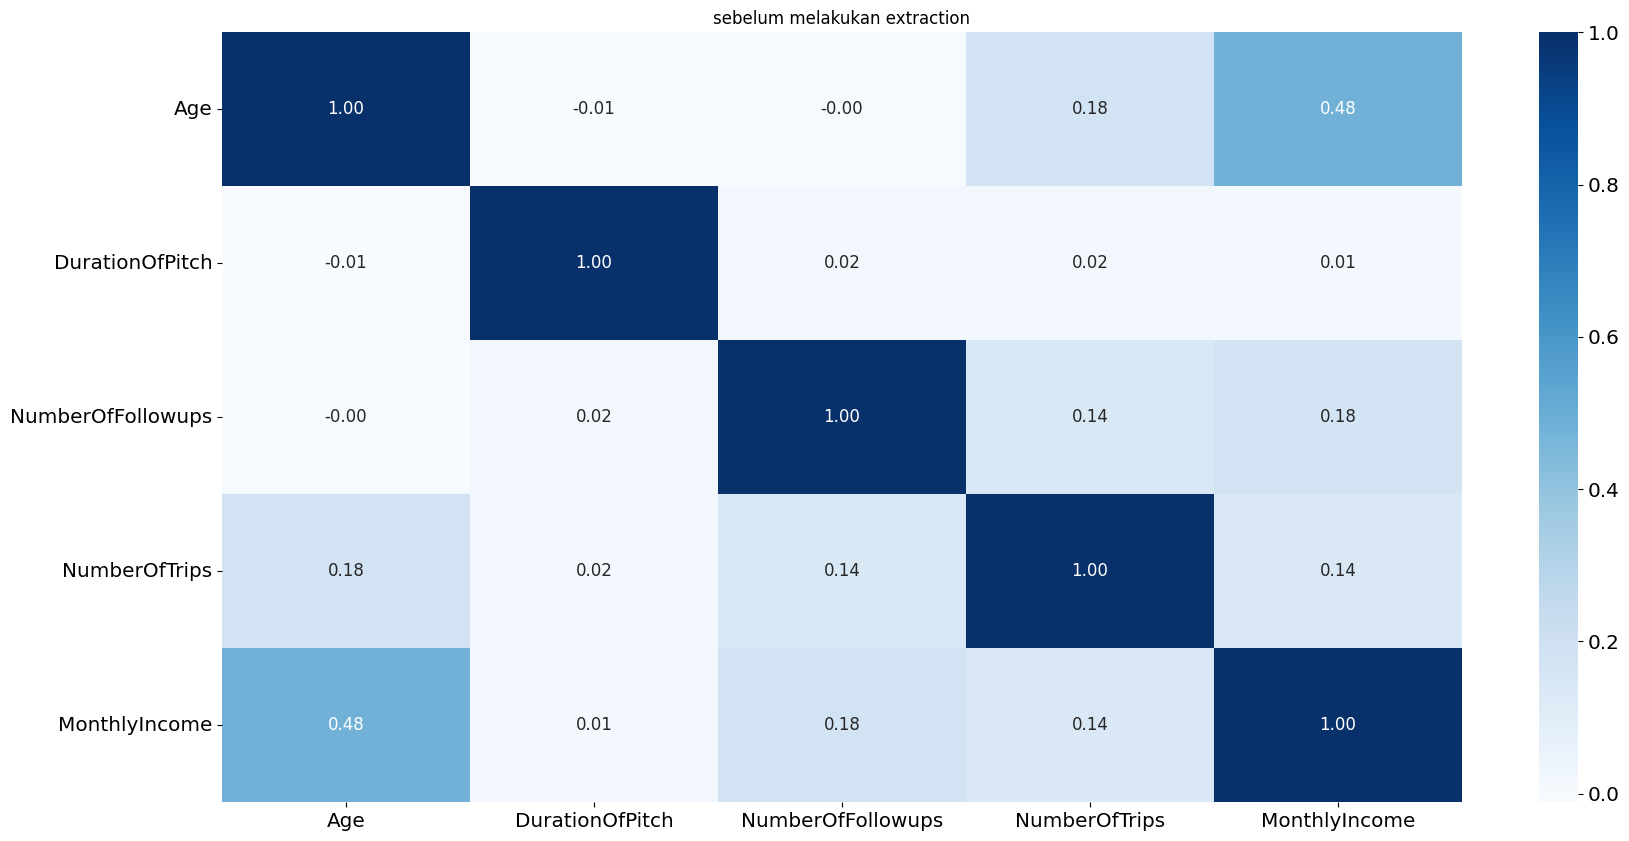

In [ ]:
sns.heatmap(df_simp4.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 12})

plt.title('sebelum melakukan extraction')

Bisa dilihat bahwa nilai korelasi paling tinggi pada fitur numerical terdapat pada fitur `Age` - `MonthlyIncome` (0.48), dan jika dilihat dengan korelasinya dengan fitur target (`ProdTaken`) ke-dua fitur memiliki korelasi negatif lemah yang berarti kedua fitur tersebut memiliki hubungan yang relatif lemah antara satu sama lain dan tidak memiliki korelasi yang signifikan dengan fitur target.<br><br>
Namun walaupun kami masih ingin melihat apakah ketika kami melakukan penambahan fitur menggunakan 2 fitur tersebut, fitur yang baru akan memberikan nilai korelasi yang lebih tinggi terhadap fitur target.

In [ ]:
## menentukan Min dan Mx dari usia
age_min = df_simp4['Age'].min()
age_max = df_simp4['Age'].max()

## lebar dari klasifikasinya
lebar = (age_max - age_min) / 4

## Fungsi untuk pengelompokkan umur
def age_cats(age):
    if age <= age_min + lebar:
        return "18-29"
    elif age <= age_min + 2 * lebar:
        return "30-41"
    elif age <= age_min + 3 * lebar:
        return "42-53"
    else:
        return "54-61"

df_simp4['class_age'] = df_simp4['Age'].apply(age_cats)

In [ ]:
df_simp4['IncomePerAgeGroup'] = df_simp4['MonthlyIncome'] / df_simp4.groupby('class_age')['Age'].transform('count')

Text(0.5, 1.0, 'sesudah menambahkan fitur baru')

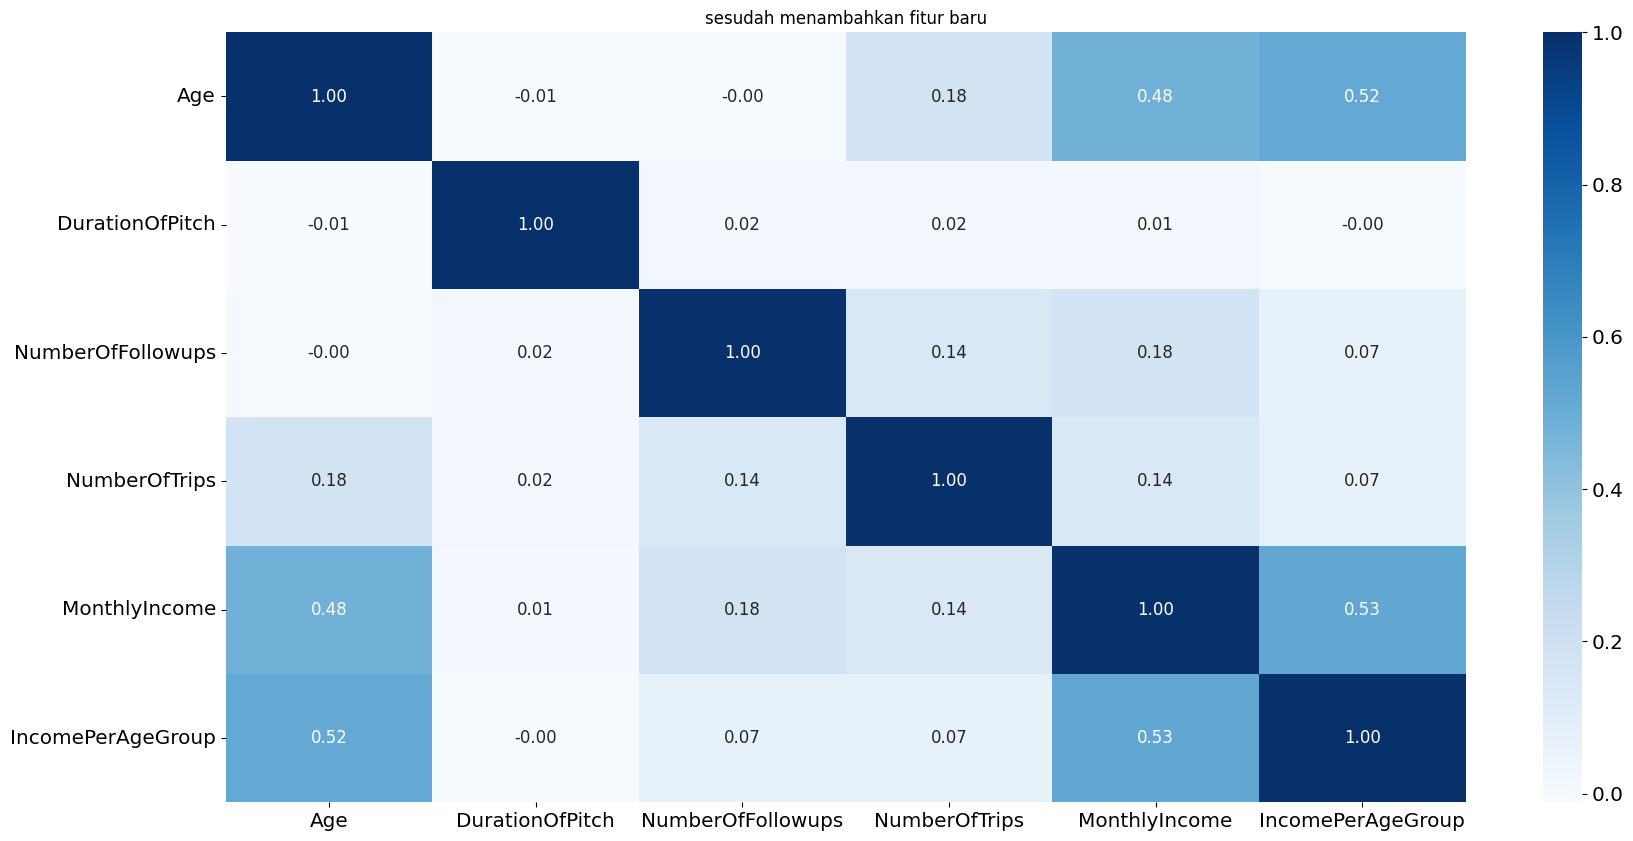

In [ ]:
sns.heatmap(df_simp4.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 12}
            )

plt.title('sesudah menambahkan fitur baru')

walaupun kami sudah melakukan penambahan fitur baru dari fitur `Age` - `MonthlyIncome`, yaitu `IncomePerAgeGroup` dimana fitur ini menggambarkan rata-rata penghasilan bulanan individu dalam setiap kelompok usia. walaupun begitu nilai korelasi antar fitur `IncomePerAgeGroup` tetap memiliki nilai negative lemah (-0.01).

## Handling Outlier

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_simp)}')

filtered_entries = np.array([True] * len(df_simp))

for col in ['Age','DurationOfPitch','NumberOfTrips', 'MonthlyIncome']:
    zscore = abs(stats.zscore(df_simp[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

df_simp = df_simp[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_simp)}')

Jumlah baris sebelum memfilter outlier: 4888
Jumlah baris setelah memfilter outlier: 4878


## Feature Transformation

<Axes: xlabel='DurationOfPitch', ylabel='Density'>

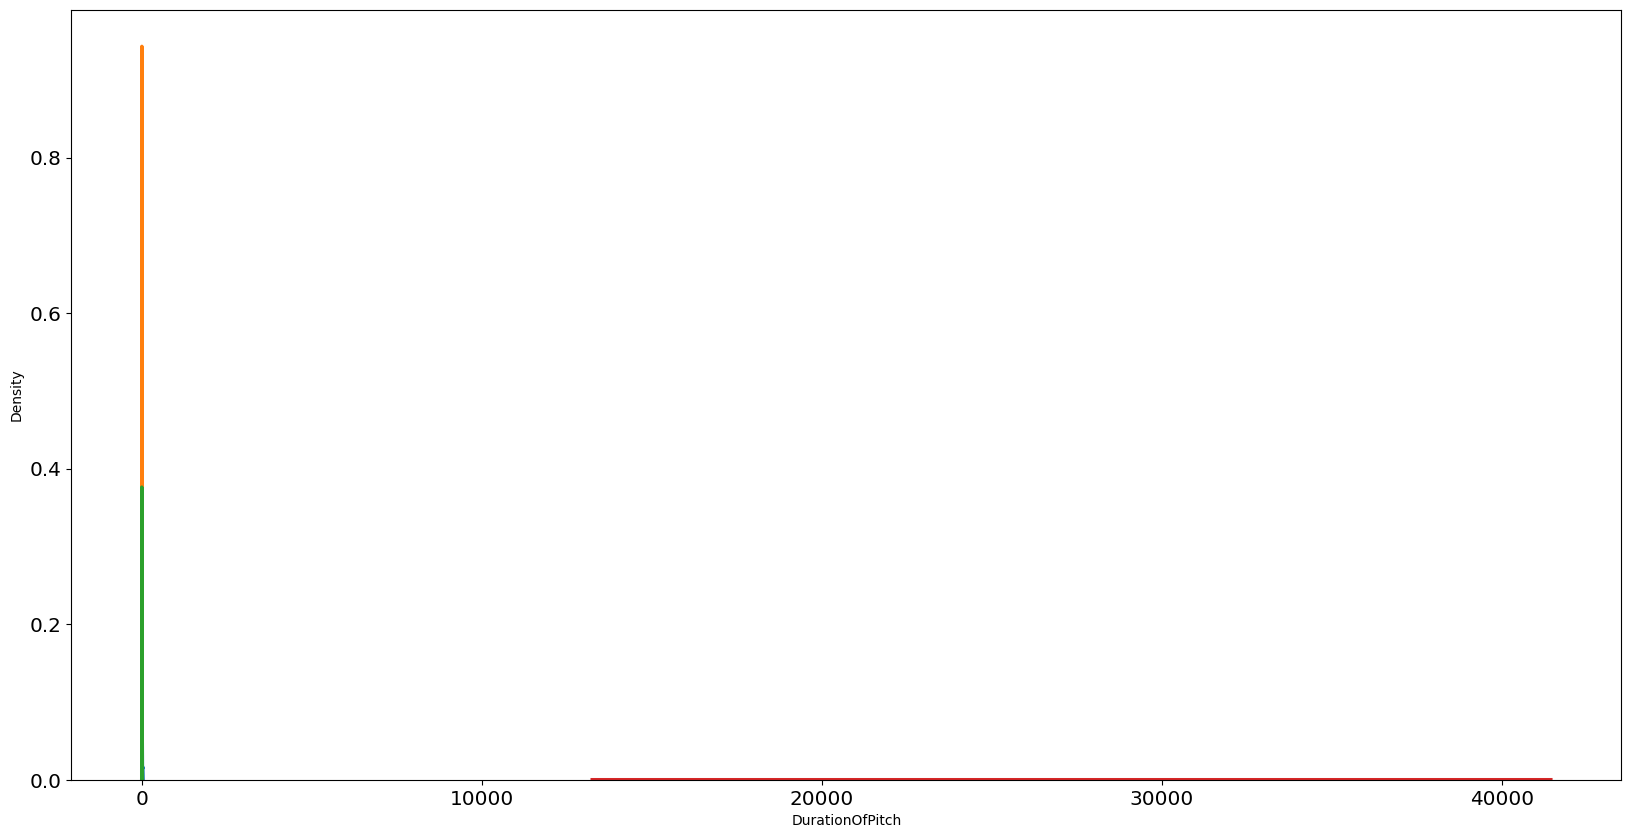

In [ ]:
#transformasi menggunakan log
#Distribusi DurationofPitch (nilai asli)
sns.kdeplot(df_simp3['DurationOfPitch'])
#Distribusi NumberOfFollowups (nilai asli)
sns.kdeplot(df_simp3['NumberOfFollowups'])
#Distribusi NumberOfTrips (nilai asli)
sns.kdeplot(df_simp3['NumberOfTrips'])
#Distribusi MonthlyIncome (nilai asli)
sns.kdeplot(df_simp3['MonthlyIncome'])

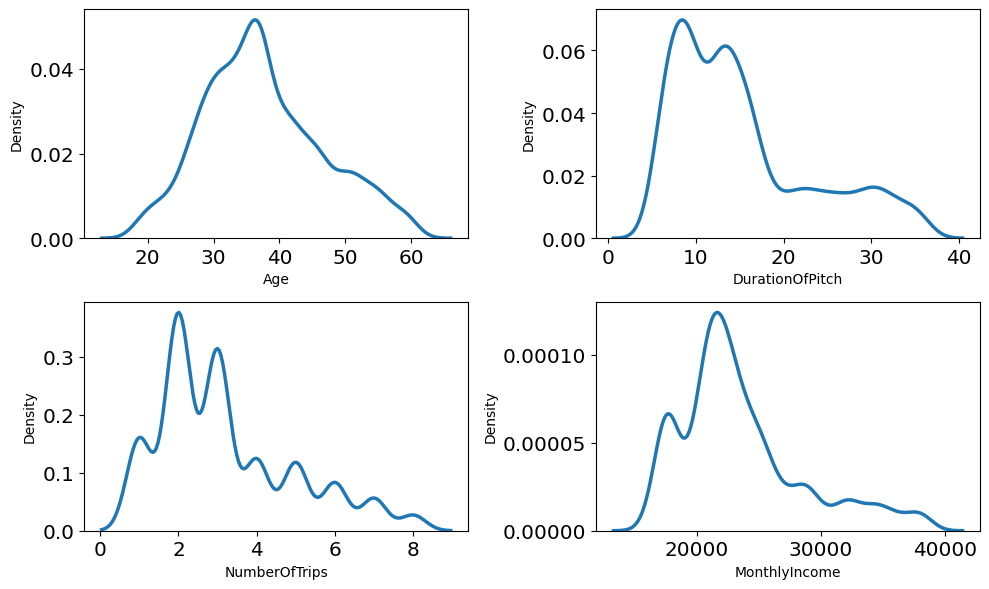

In [ ]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=df_simp3[col])
  plt.xlabel(col)
  plt.tight_layout()



<Axes: xlabel='DurationOfPitch', ylabel='Density'>

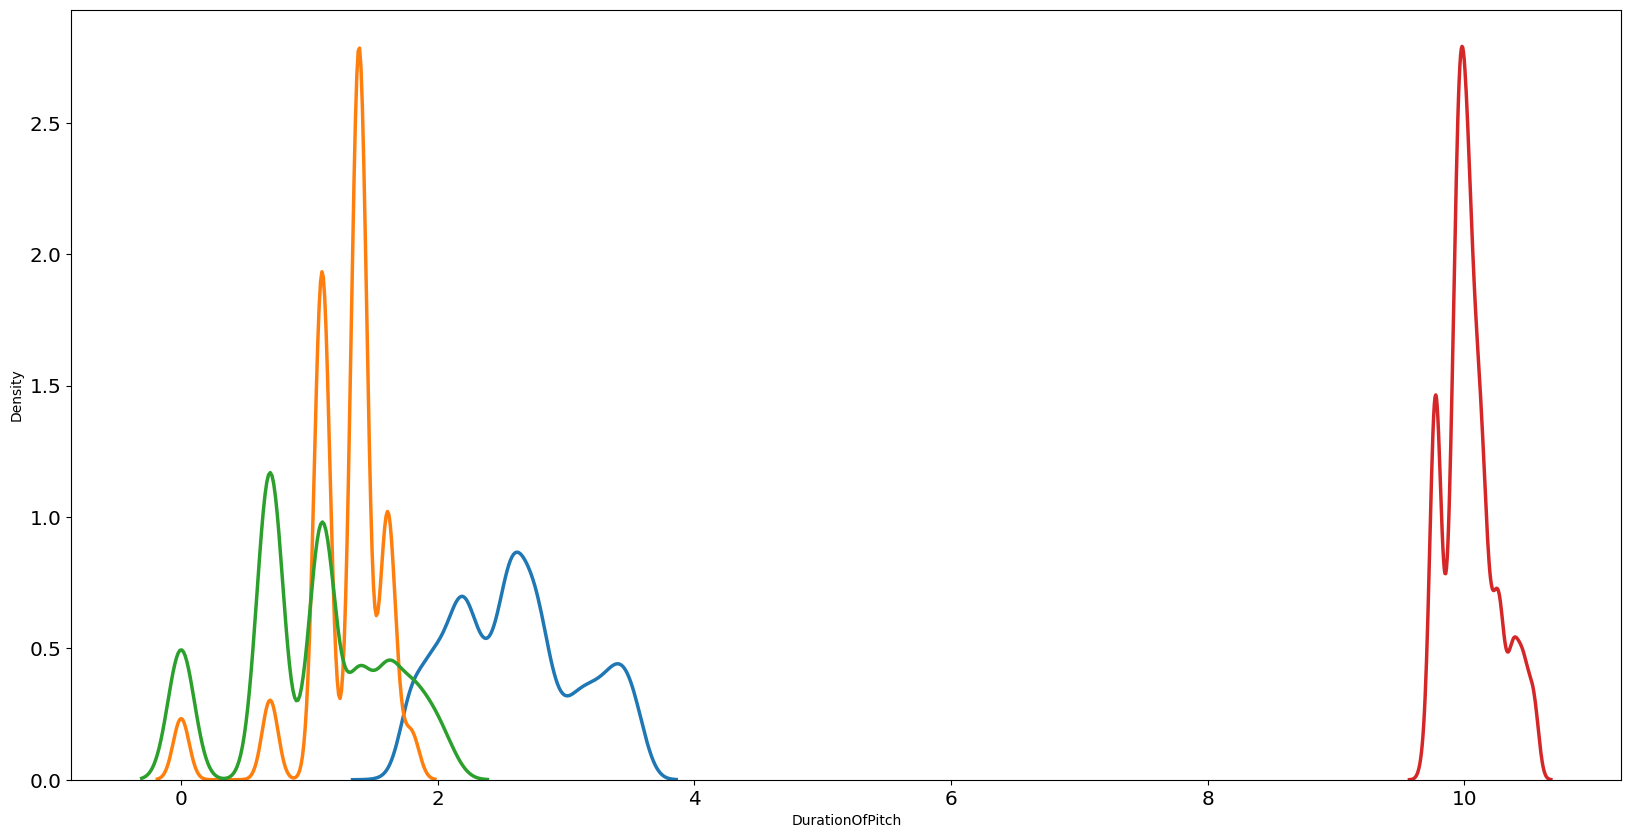

In [ ]:
sns.kdeplot(np.log(df_simp3['DurationOfPitch']))
sns.kdeplot(np.log(df_simp3['NumberOfFollowups']))
sns.kdeplot(np.log(df_simp3['NumberOfTrips']))
sns.kdeplot(np.log(df_simp3['MonthlyIncome']))

In [ ]:
#Transformasi
df_simp3['DurationOfPitch'] = np.log(df_simp3['DurationOfPitch'])
df_simp3['NumberOfTrips'] = np.log(df_simp3['NumberOfTrips'])
df_simp3['MonthlyIncome'] = np.log(df_simp3['MonthlyIncome'])

# #Drop kolom (nilai asli)
# df = df_simp3.drop(columns='DurationOfPitch')
# df = df_simp3.drop(columns='NumberOfFollowups')
# df = df_simp3.drop(columns='NumberOfTrips')
# df = df_simp3.drop(columns='MonthlyIncome')

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Normalization (outlier yang berjarak dekat)
df_simp3['Age_norm'] = MinMaxScaler().fit_transform(df_simp3['Age'].values.reshape(len(df_simp3), 1))

#Standardization (outlier yang berjarak jauh)
df_simp3['DOP_norm'] = StandardScaler().fit_transform(df_simp3['DurationOfPitch'].values.reshape(len(df_simp3), 1))
df_simp3['MI_std'] = StandardScaler().fit_transform(df_simp3['MonthlyIncome'].values.reshape(len(df_simp3), 1))

#Drop kolom (nilai asli)
df_simp3 = df_simp3.drop(columns='DurationOfPitch')
df_simp3 = df_simp3.drop(columns='Age')
# df_simp3 = df_simp3.drop(columns='NumberOfTrips')
df_simp3 = df_simp3.drop(columns='MonthlyIncome')

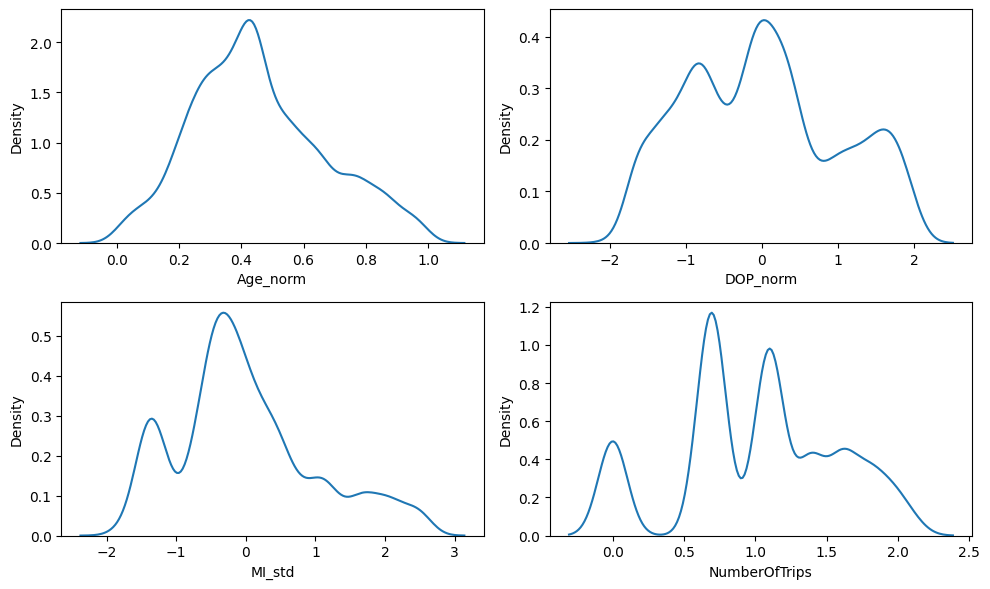

In [ ]:
plt.figure(figsize=(10,6))
for i, col in enumerate(['Age_norm','DOP_norm','MI_std', 'NumberOfTrips']):
  plt.subplot(2,2,i+1)
  sns.kdeplot(x=df_simp3[col])
  plt.xlabel(col)
  plt.tight_layout()

In [ ]:
df_simp3[['Age_norm', 'DOP_norm','MI_std', 'NumberOfTrips']].describe()

,Age_norm,DOP_norm,MI_std,NumberOfTrips
count,4878.000000,4.878000e+03,4.878000e+03,4878.000000
mean,0.455643,-6.991810e-17,-1.701341e-15,1.018259
std,0.211738,1.000103e+00,1.000103e+00,0.559555
min,0.000000,-1.988835e+00,-1.825741e+00,0.000000
25%,0.302326,-8.116520e-01,-5.915465e-01,0.693147
50%,0.441860,-7.519571e-02,-1.564394e-01,1.098612
75%,0.581395,6.848225e-01,4.883490e-01,1.386294
max,1.000000,1.964732e+00,2.588952e+00,2.079442


In [ ]:
df_simp3[['Age_norm', 'DOP_norm','MI_std', 'NumberOfTrips']].describe()

,Age_norm,DOP_norm,MI_std,NumberOfTrips
count,4878.000000,4.878000e+03,4.878000e+03,4878.000000
mean,0.455643,-6.991810e-17,-1.701341e-15,1.018259
std,0.211738,1.000103e+00,1.000103e+00,0.559555
min,0.000000,-1.988835e+00,-1.825741e+00,0.000000
25%,0.302326,-8.116520e-01,-5.915465e-01,0.693147
50%,0.441860,-7.519571e-02,-1.564394e-01,1.098612
75%,0.581395,6.848225e-01,4.883490e-01,1.386294
max,1.000000,1.964732e+00,2.588952e+00,2.079442


## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
df_feature = df_simp3.drop('ProdTaken',1)
sr_outcome = df_simp3['ProdTaken']

# Pisahkan fitur numerik yang telah diubah dengan fitur kategorikal
num_col = ['DOP_norm', 'NumberOfFollowups','NumberOfTrips','MI_std',
           'NumberOfChildrenVisiting', 'NumberOfPersonVisiting']
df_fenum = df_feature[num_col]

# Inisialisasi objek feature selector dengan metode chi-square test
selector1 = SelectKBest(score_func=f_classif, k=4)# Ubah nilai k sesuai kebutuhan

# Fit dan transformasikan data menggunakan selector
selected_fenum = selector1.fit_transform(df_fenum, sr_outcome)

# Dapatkan indeks fitur yang terpilih
selected_fenum_indices = selector1.get_support(indices=True)

# Dapatkan nama fitur yang terpilih
selected_fenum_names = df_fenum.columns[selected_fenum_indices]

# Tampilkan hasil
final_fenum = pd.DataFrame(selected_fenum, columns=selected_fenum_names)
final_fenum.columns

Index(['DOP_norm', 'NumberOfFollowups', 'MI_std', 'NumberOfPersonVisiting'], dtype='object')

In [ ]:
final_fenum

,DOP_norm,NumberOfFollowups,MI_std,NumberOfPersonVisiting
0,-1.623692,3.0,-0.469254,3.0
1,0.073223,4.0,-0.679344,3.0
2,-1.047541,4.0,-1.498716,3.0
3,-0.811652,3.0,-1.264443,2.0
4,-1.047541,3.0,-1.110615,2.0
...,...,...,...,...
4873,-0.811652,5.0,0.710973,3.0
4874,1.665259,5.0,-0.417314,4.0
4875,0.462067,4.0,1.612267,4.0
4876,0.340652,4.0,-0.639968,3.0


In [ ]:
# Pisahkan fitur numerik yang telah diubah dengan fitur kategorikal
cat_col = ['status_Divorced', 'status_Married', 'status_Unmarried', 'work_Large Business', 'work_Salaried', 'work_Small Business',
           'TypeofContact', 'CityTier', 'Gender', 'ProductPitched','PreferredPropertyStar', 'Passport','PitchSatisfactionScore','OwnCar','Designation']
df_fecat = df_feature[cat_col]

# Inisialisasi objek feature selector dengan metode chi-square test
selector = SelectKBest(score_func=chi2, k=10)  # Ubah nilai k sesuai kebutuhan

# Fit dan transformasikan data menggunakan selector
selected_fecat = selector.fit_transform(df_fecat, sr_outcome)

# Dapatkan indeks fitur yang terpilih
selected_fecat_indices = selector.get_support(indices=True)

# Dapatkan nama fitur yang terpilih
selected_fecat_names = df_fecat.columns[selected_fecat_indices]

# Tampilkan hasil
final_fecat = pd.DataFrame(selected_fecat, columns=selected_fecat_names)
final_fecat.columns

Index(['status_Divorced', 'status_Married', 'status_Unmarried',
       'work_Large Business', 'TypeofContact', 'CityTier', 'ProductPitched',
       'PreferredPropertyStar', 'Passport', 'Designation'],
      dtype='object')

In [ ]:
final_fecat

,status_Divorced,status_Married,status_Unmarried,work_Large Business,TypeofContact,CityTier,ProductPitched,PreferredPropertyStar,Passport,Designation
0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,3.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
4873,0.0,0.0,1.0,0.0,0.0,3.0,2.0,4.0,1.0,0.0
4874,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0
4875,0.0,1.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,1.0
4876,0.0,0.0,1.0,0.0,0.0,3.0,1.0,3.0,0.0,2.0


In [ ]:
df_simp3_final = pd.concat([final_fenum,final_fecat], axis=1)
# df_simp3 = df_simp3[col]
print(f'''feature hasil seleksi: {df_simp3_final.columns}, and {df_simp3_final.shape[1]}''')

feature hasil seleksi: Index(['DOP_norm', 'NumberOfFollowups', 'MI_std', 'NumberOfPersonVisiting',
       'status_Divorced', 'status_Married', 'status_Unmarried',
       'work_Large Business', 'TypeofContact', 'CityTier', 'ProductPitched',
       'PreferredPropertyStar', 'Passport', 'Designation'],
      dtype='object'), and 14


In [ ]:
df_simp3_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4878 entries, 0 to 4877
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DOP_norm                4878 non-null   float64
 1   NumberOfFollowups       4878 non-null   float64
 2   MI_std                  4878 non-null   float64
 3   NumberOfPersonVisiting  4878 non-null   float64
 4   status_Divorced         4878 non-null   float64
 5   status_Married          4878 non-null   float64
 6   status_Unmarried        4878 non-null   float64
 7   work_Large Business     4878 non-null   float64
 8   TypeofContact           4878 non-null   float64
 9   CityTier                4878 non-null   float64
 10  ProductPitched          4878 non-null   float64
 11  PreferredPropertyStar   4878 non-null   float64
 12  Passport                4878 non-null   float64
 13  Designation             4878 non-null   float64
dtypes: float64(14)
memory usage: 533.7 KB


##Split Dataset

In [ ]:
X = df_simp3_final
y = df_simp3['ProdTaken']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Jumlah train dataset  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah test dataset terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah train dataset  terdiri dari 3902 baris
Jumlah class 0 : 3174
Jumlah class 1 : 728

Jumlah test dataset terdiri dari 976 baris
Jumlah class 0 : 786
Jumlah class 1 : 190



## Class Imbalace

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train, y_train =smote.fit_resample(X_train, y_train)

In [ ]:
print(f'Jumlah train dataset  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah train dataset  terdiri dari 4761 baris
Jumlah class 0 : 3174
Jumlah class 1 : 1587



#Machine Learning Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Membangun model Decision Tree
model_tree = DecisionTreeClassifier()

# Melatih model dengan data latih
model_tree.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = model_tree.predict(X_test)


# evaluating the model
print('Training Accuracy :', model_tree.score(X_train, y_train))
print('Testing Accuracy :', model_tree.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Evaluasi model
print('\nClassification report:')
print(classification_report(y_test, y_pred))

Training Accuracy : 1.0
Testing Accuracy : 0.9006147540983607

Confusion matrix
[[732  54]
 [ 43 147]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       786
           1       0.73      0.77      0.75       190

    accuracy                           0.90       976
   macro avg       0.84      0.85      0.84       976
weighted avg       0.90      0.90      0.90       976



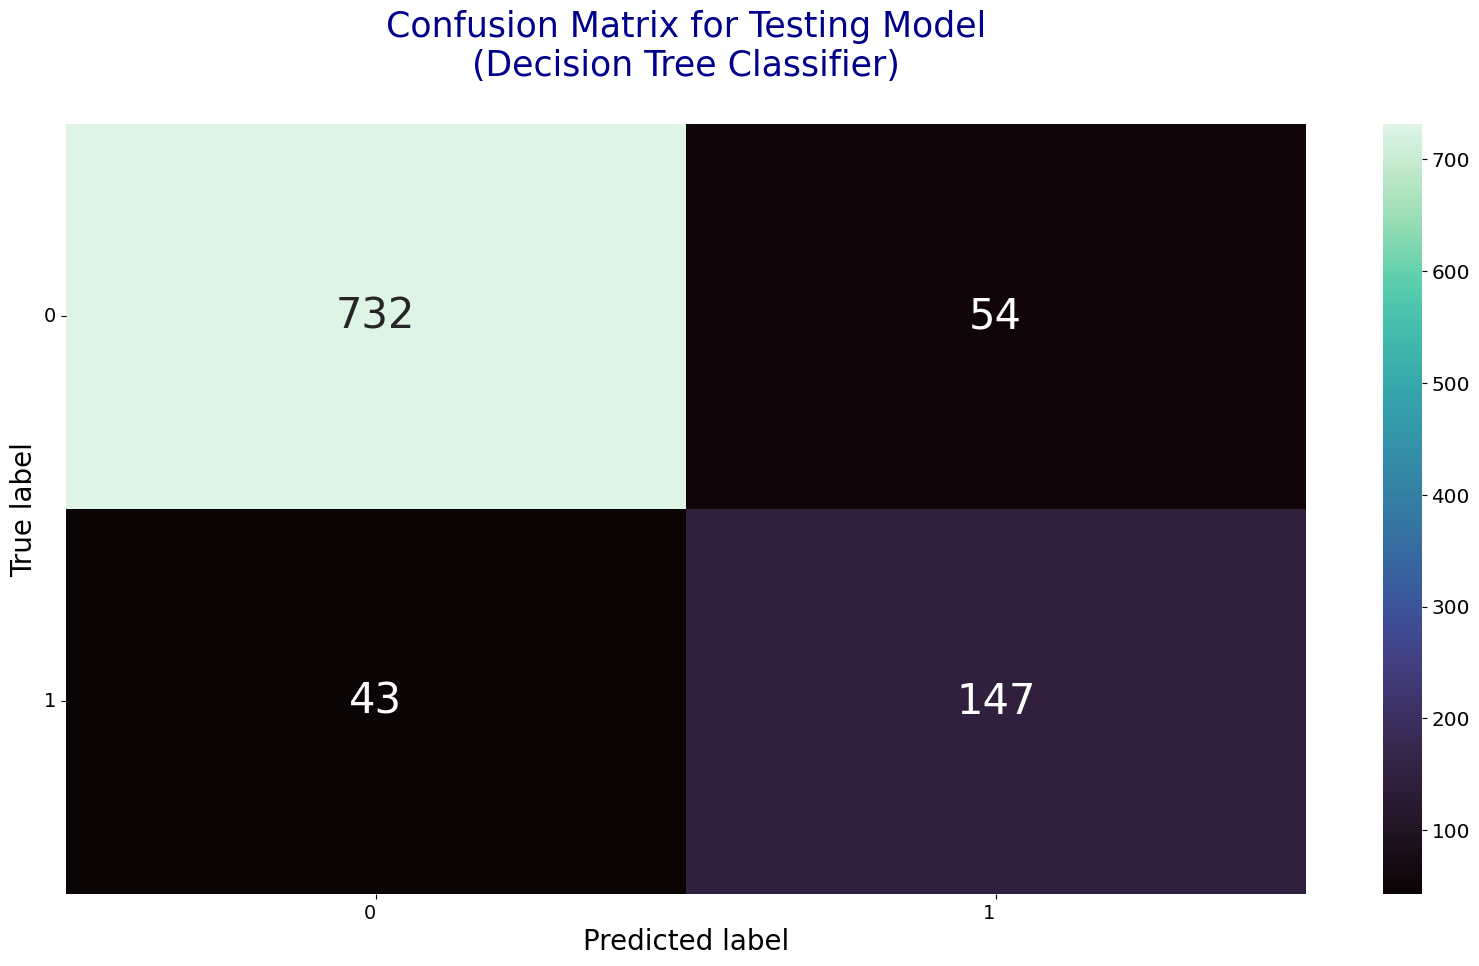

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='mako')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

# Inisialisasi model XGBoost
XGB = xgb.XGBClassifier()
# Fit the classifier to the training data
model_XGB = XGB.fit(X_train, y_train)
#Training Model: Predict
y_pred = model_XGB.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model_XGB.score(X_train, y_train))
print('Testing Accuracy :', model_XGB.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9880277252678009
Testing Accuracy : 0.9006147540983607

Confusion matrix
[[763  23]
 [ 74 116]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       786
           1       0.83      0.61      0.71       190

    accuracy                           0.90       976
   macro avg       0.87      0.79      0.82       976
weighted avg       0.90      0.90      0.89       976



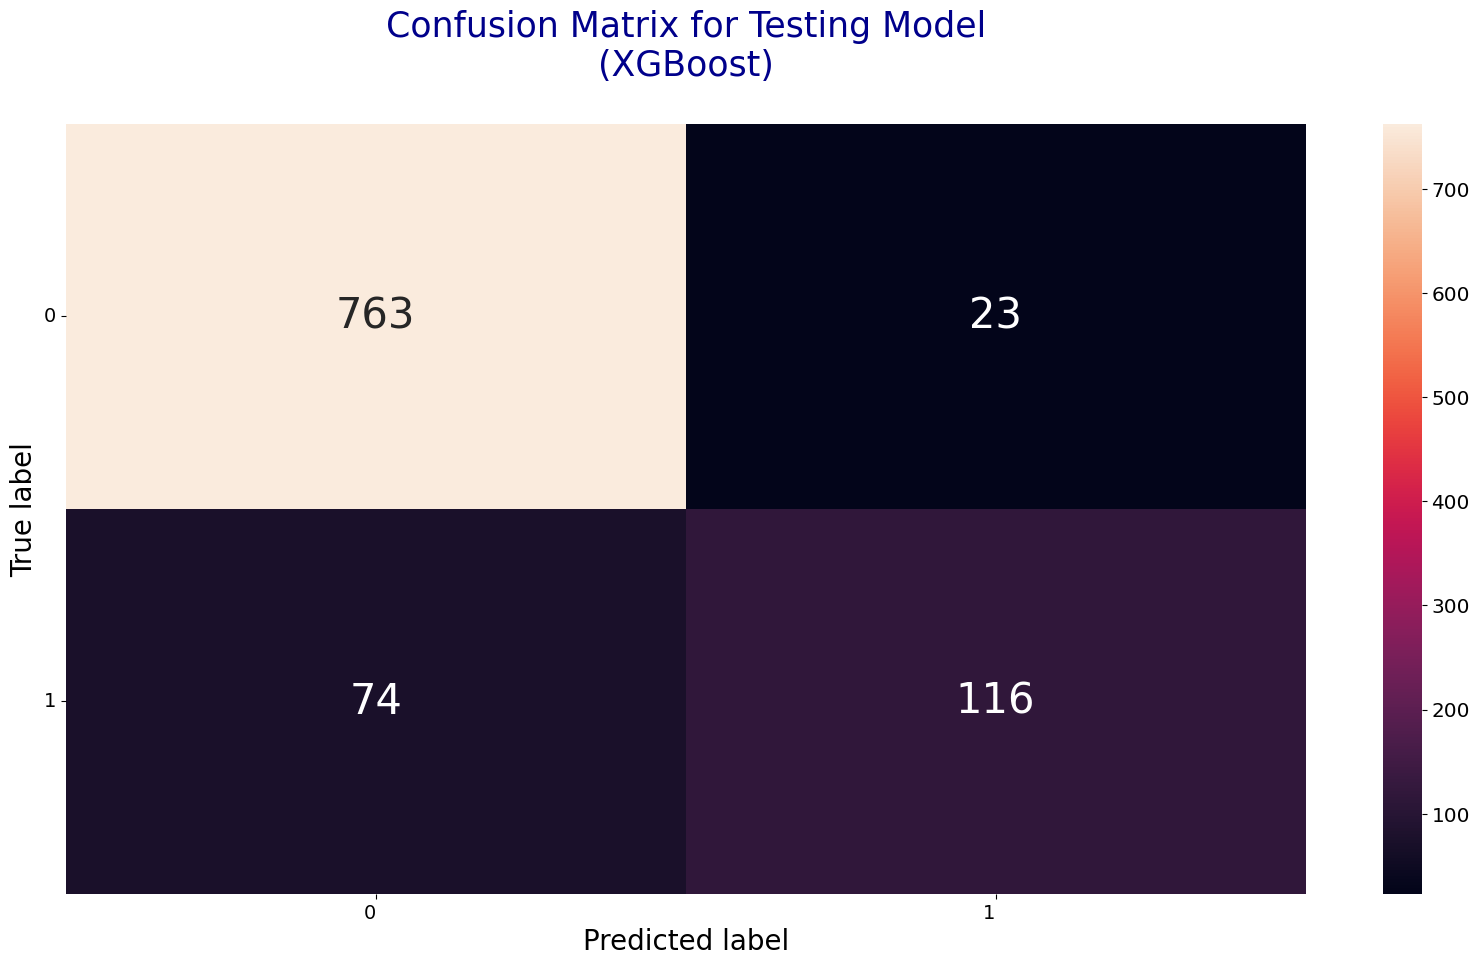

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(XGBoost)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
model_logreg = logreg.fit(X_train, y_train)
#Training Model: Predict
y_pred = model_logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model_logreg.score(X_train, y_train))
print('Testing Accuracy :', model_logreg.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.7781978575929427
Testing Accuracy : 0.8309426229508197

Confusion matrix
[[715  71]
 [ 94  96]]

Classification report
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       786
           1       0.57      0.51      0.54       190

    accuracy                           0.83       976
   macro avg       0.73      0.71      0.72       976
weighted avg       0.82      0.83      0.83       976



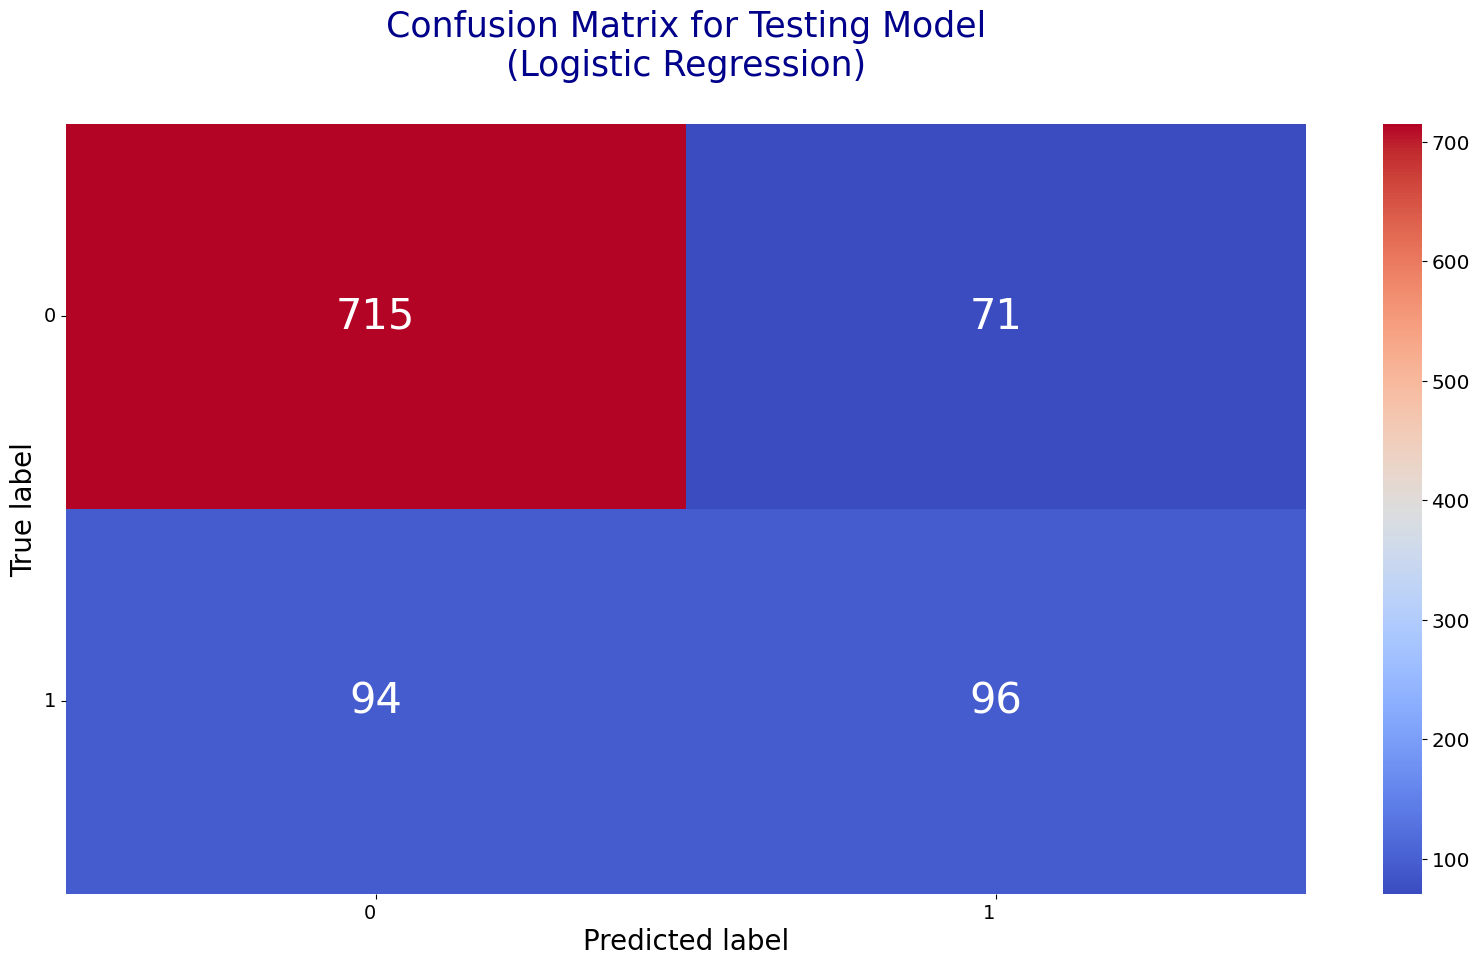

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='coolwarm')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Call the classifier
RanFor =RandomForestClassifier()
# Fit the classifier to the training data
model_RanFor = RanFor.fit(X_train, y_train)
#Training Model: Predict
y_pred = model_RanFor.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model_RanFor.score(X_train, y_train))
print('Testing Accuracy :', model_RanFor.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9006147540983607

Confusion matrix
[[761  25]
 [ 72 118]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       786
           1       0.83      0.62      0.71       190

    accuracy                           0.90       976
   macro avg       0.87      0.79      0.82       976
weighted avg       0.90      0.90      0.90       976



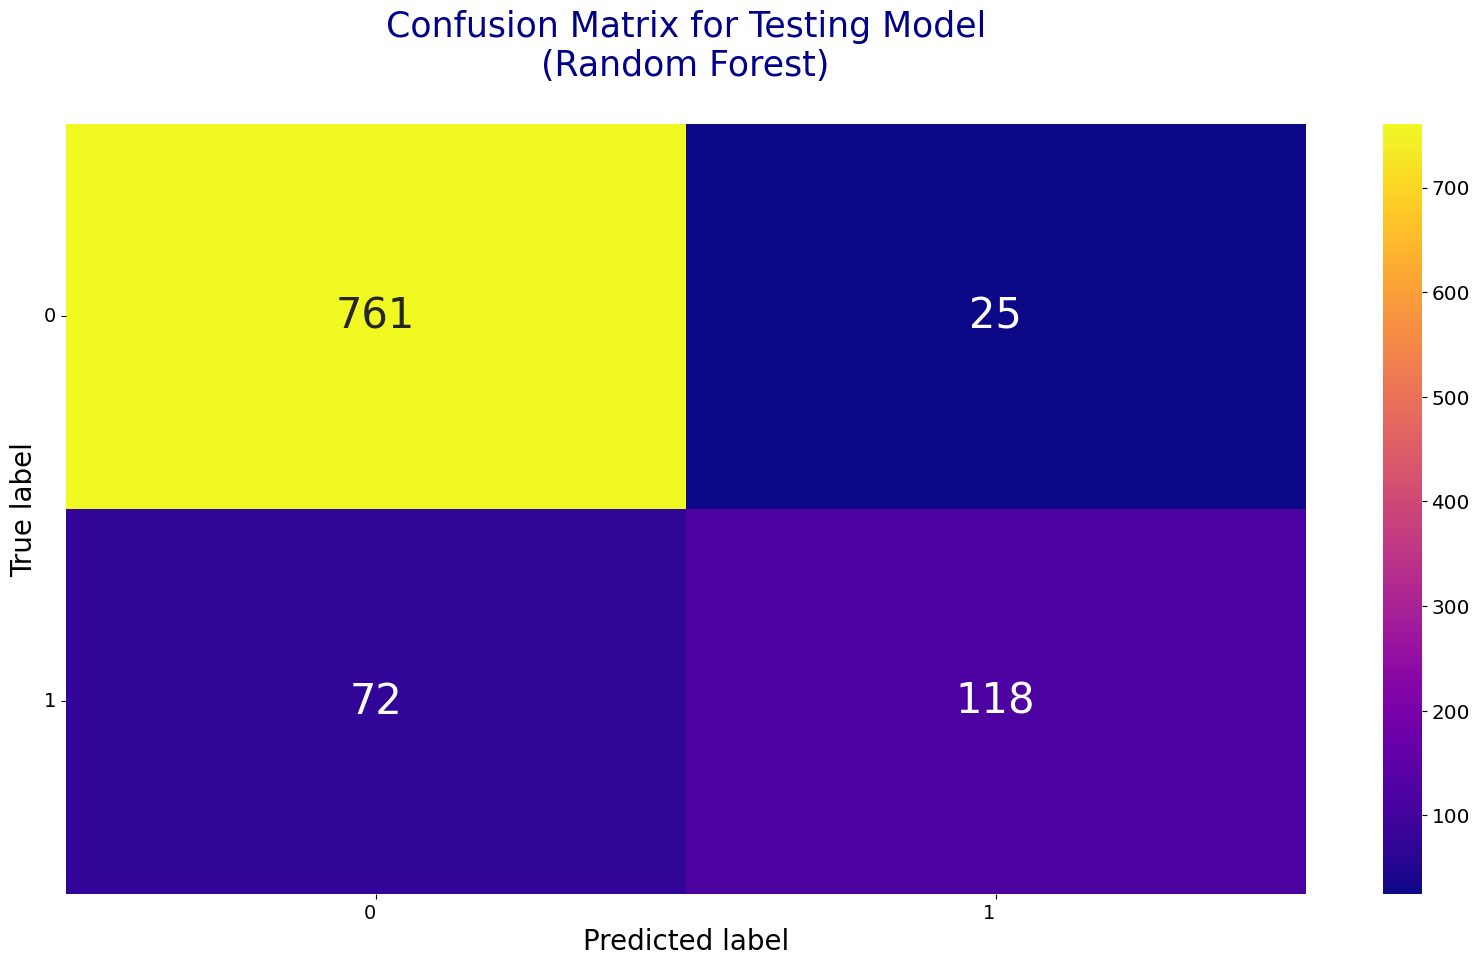

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='plasma')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Call the classifier
SVC = svm.SVC()
# Fit the classifier to the training data
model_SVC = SVC.fit(X_train, y_train)
#Training Model: Predict
y_pred = model_SVC.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model_SVC.score(X_train, y_train))
print('Testing Accuracy :', model_SVC.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8010922075194287
Testing Accuracy : 0.8483606557377049

Confusion matrix
[[737  49]
 [ 99  91]]

Classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       786
           1       0.65      0.48      0.55       190

    accuracy                           0.85       976
   macro avg       0.77      0.71      0.73       976
weighted avg       0.84      0.85      0.84       976



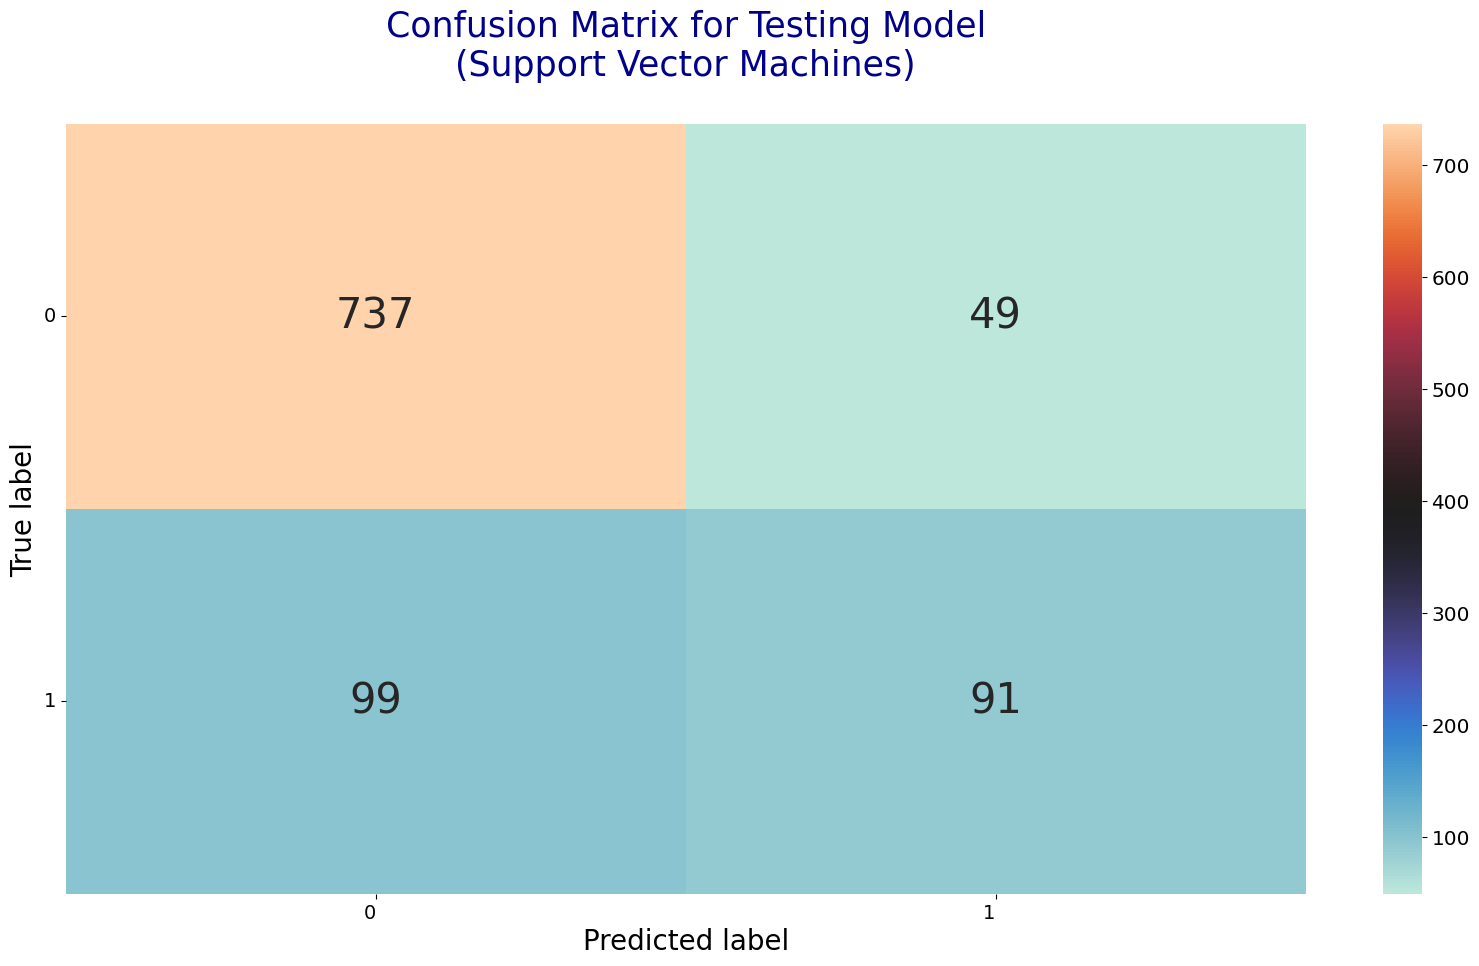

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 30}, fmt='d', cmap='icefire')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Support Vector Machines)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

Berdasarkan hasil yang diberikan, dapat ditarik kesimpulan sebagai berikut:

Training Accuracy: 1.0 dan Testing Accuracy: 0.8995

Training Accuracy mengindikasikan seberapa baik model memprediksi data pelatihan yang digunakan untuk melatih model.
Testing Accuracy mengindikasikan seberapa baik model memprediksi data uji yang tidak digunakan dalam proses pelatihan.
Confusion Matrix:

* Terdapat 715 prediksi benar untuk kelas 0 (True Negative).
* Terdapat 71 prediksi salah untuk kelas 0 (False Positive).
* Terdapat 96 prediksi salah untuk kelas 1 (False Negative).
* Terdapat 94 prediksi benar untuk kelas 1 (True Positive).

Classification Report:

* Precision adalah proporsi prediksi benar positif dari keseluruhan prediksi positif. Precision untuk kelas 0 adalah 0.88, sedangkan untuk kelas 1 adalah 0.57.
* Recall adalah proporsi prediksi benar positif dari keseluruhan data yang sebenarnya positif. Recall untuk kelas 0 adalah 0.91, sedangkan untuk kelas 1 adalah 0.51.
* F1-score adalah ukuran rata-rata harmonik antara precision dan recall.      * F1-score untuk kelas 0 adalah 0.90, sedangkan untuk kelas 1 adalah 0.54.
* Support adalah jumlah data yang termasuk dalam setiap kelas.

Kesimpulan:

* Model memiliki tingkat akurasi yang relatif baik dengan Testing Accuracy sebesar 0.8995.
* Model cenderung lebih baik dalam memprediksi kelas 0 (nilai 0) dengan precision, recall, dan f1-score yang lebih tinggi dibandingkan dengan kelas 1 (nilai 1).
*  Meskipun tingkat akurasi secara keseluruhan baik, terdapat kesalahan prediksi dalam memprediksi kelas 1 dengan jumlah False Negative yang cukup signifikan (96).
* Model perlu diperbaiki untuk meningkatkan performa dalam memprediksi kelas 1.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier().fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[763  23]
 [ 79 111]]
0.8954918032786885
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       786
           1       0.83      0.58      0.69       190

    accuracy                           0.90       976
   macro avg       0.87      0.78      0.81       976
weighted avg       0.89      0.90      0.89       976



Mean squared error of testing set: 0.15163934426229508
Mean absolute error of testing set: 0.15163934426229508
Root Mean Squared Error of testing set: 0.38940896787605583


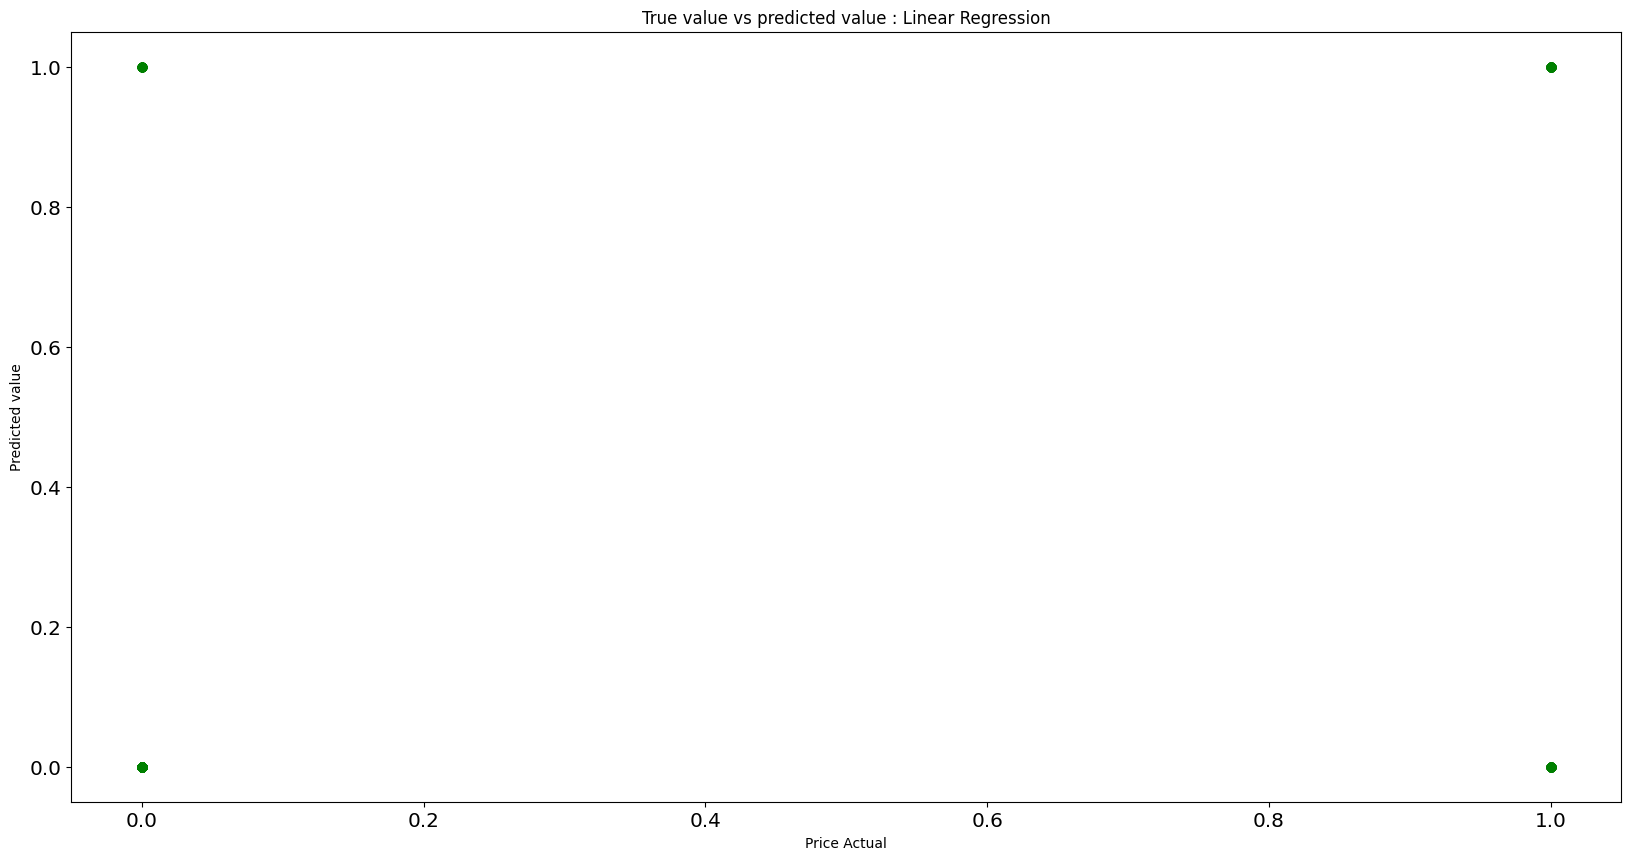

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)

#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

Berdasarkan hasil yang diberikan, dapat ditarik kesimpulan sebagai berikut:

* Mean Squared Error (MSE) pada set data uji adalah 0.1690. MSE mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya. Semakin rendah MSE, semakin baik kualitas prediksi model.

* Mean Absolute Error (MAE) pada set data uji adalah 0.1690. MAE mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Semakin rendah MAE, semakin baik kualitas prediksi model.

* Root Mean Squared Error (RMSE) pada set data uji adalah 0.41116. RMSE merupakan akar kuadrat dari MSE, dan memberikan gambaran rata-rata selisih antara nilai prediksi dan nilai sebenarnya. Semakin rendah RMSE, semakin baik kualitas prediksi model.

Kesimpulan:

* Model memiliki tingkat kesalahan yang relatif rendah, dengan MSE, MAE, dan RMSE yang cukup baik.
* Hasil ini menunjukkan bahwa model memiliki kemampuan yang baik dalam melakukan prediksi yang akurat terhadap data uji.
* Namun, perlu juga diperhatikan konteks dari masalah yang diselesaikan dan skala nilai yang digunakan dalam evaluasi untuk menentukan apakah nilai-nilai tersebut memenuhi tujuan yang diinginkan.

##Hyperparameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# medefinisikan classifier
classifier = DecisionTreeClassifier()

# mengatur parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# menentukan cross validation untuk grid search
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score:  0.8892976040353091


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek DecisionTreeClassifier dengan parameter yang diberikan
model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=5)

# Melatih model dengan data latih
model.fit(X_train, y_train)

# Membuat prediksi dengan data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model pada data latih dan data uji
training_accuracy = model.score(X_train, y_train)
testing_accuracy = model.score(X_test, y_test)

# Menampilkan hasil
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

# Menghitung confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Menampilkan classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

Training Accuracy: 0.9848771266540642
Testing Accuracy: 0.8831967213114754
Confusion matrix:
[[728  58]
 [ 56 134]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       786
           1       0.70      0.71      0.70       190

    accuracy                           0.88       976
   macro avg       0.81      0.82      0.81       976
weighted avg       0.88      0.88      0.88       976



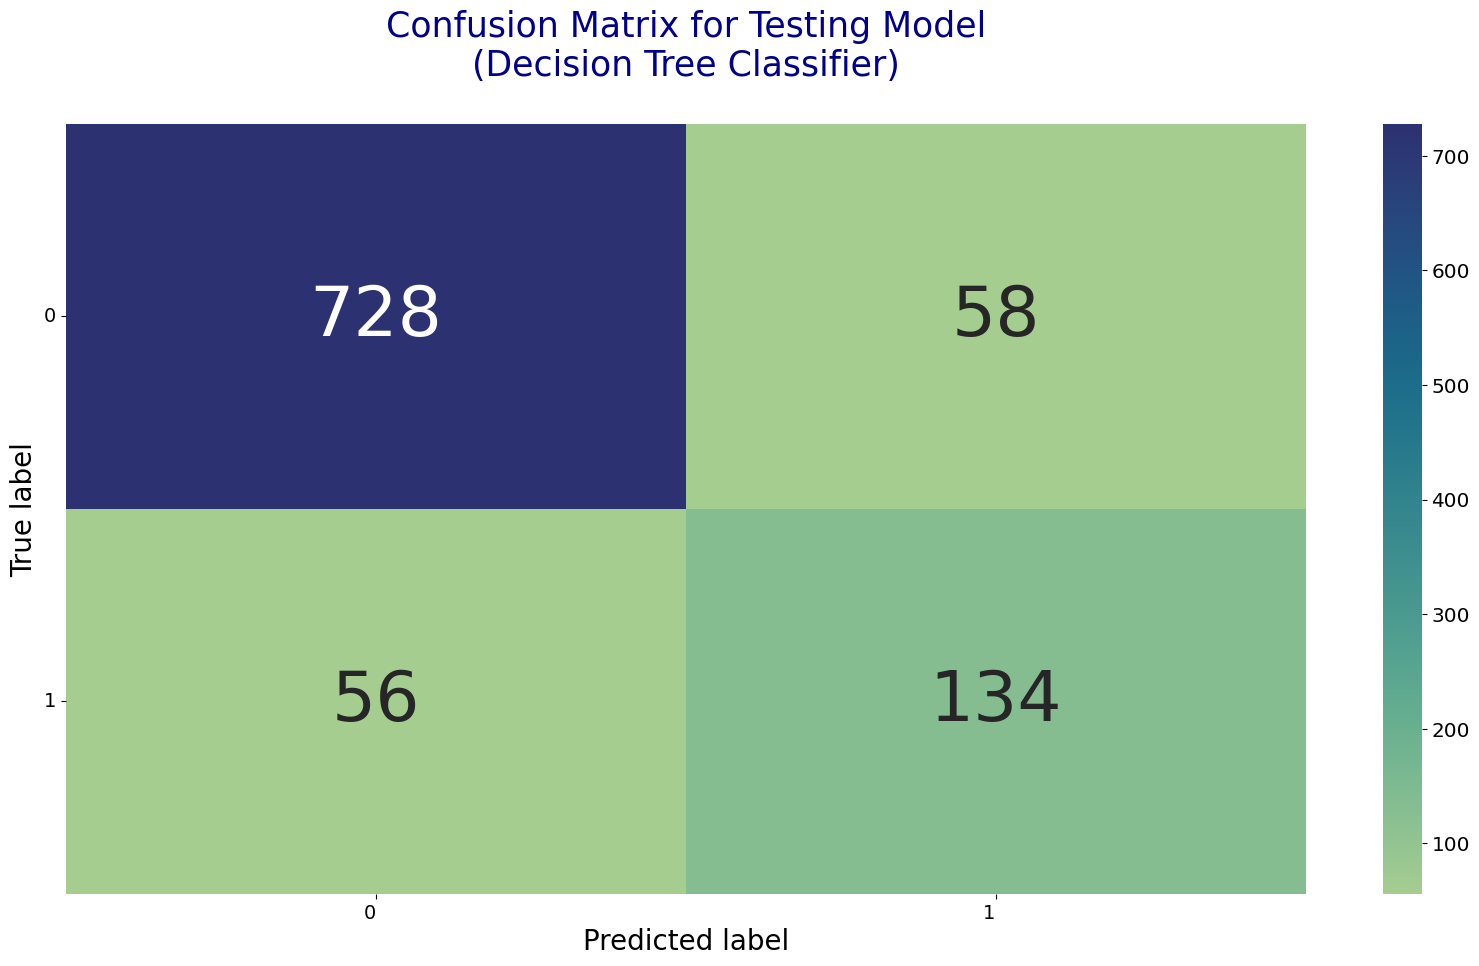

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred)))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 50}, fmt='d', cmap='crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=25, color='darkblue')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

##Feature Importance Visualization Using Shap Values

                   Feature  Importance
5           status_Married    0.001145
4          status_Divorced    0.003083
7      work_Large Business    0.033027
3   NumberOfPersonVisiting    0.042747
13             Designation    0.043140
8            TypeofContact    0.050517
9                 CityTier    0.053691
10          ProductPitched    0.062116
1        NumberOfFollowups    0.067128
11   PreferredPropertyStar    0.079145
6         status_Unmarried    0.080344
12                Passport    0.140576
2                   MI_std    0.170693
0                 DOP_norm    0.172649


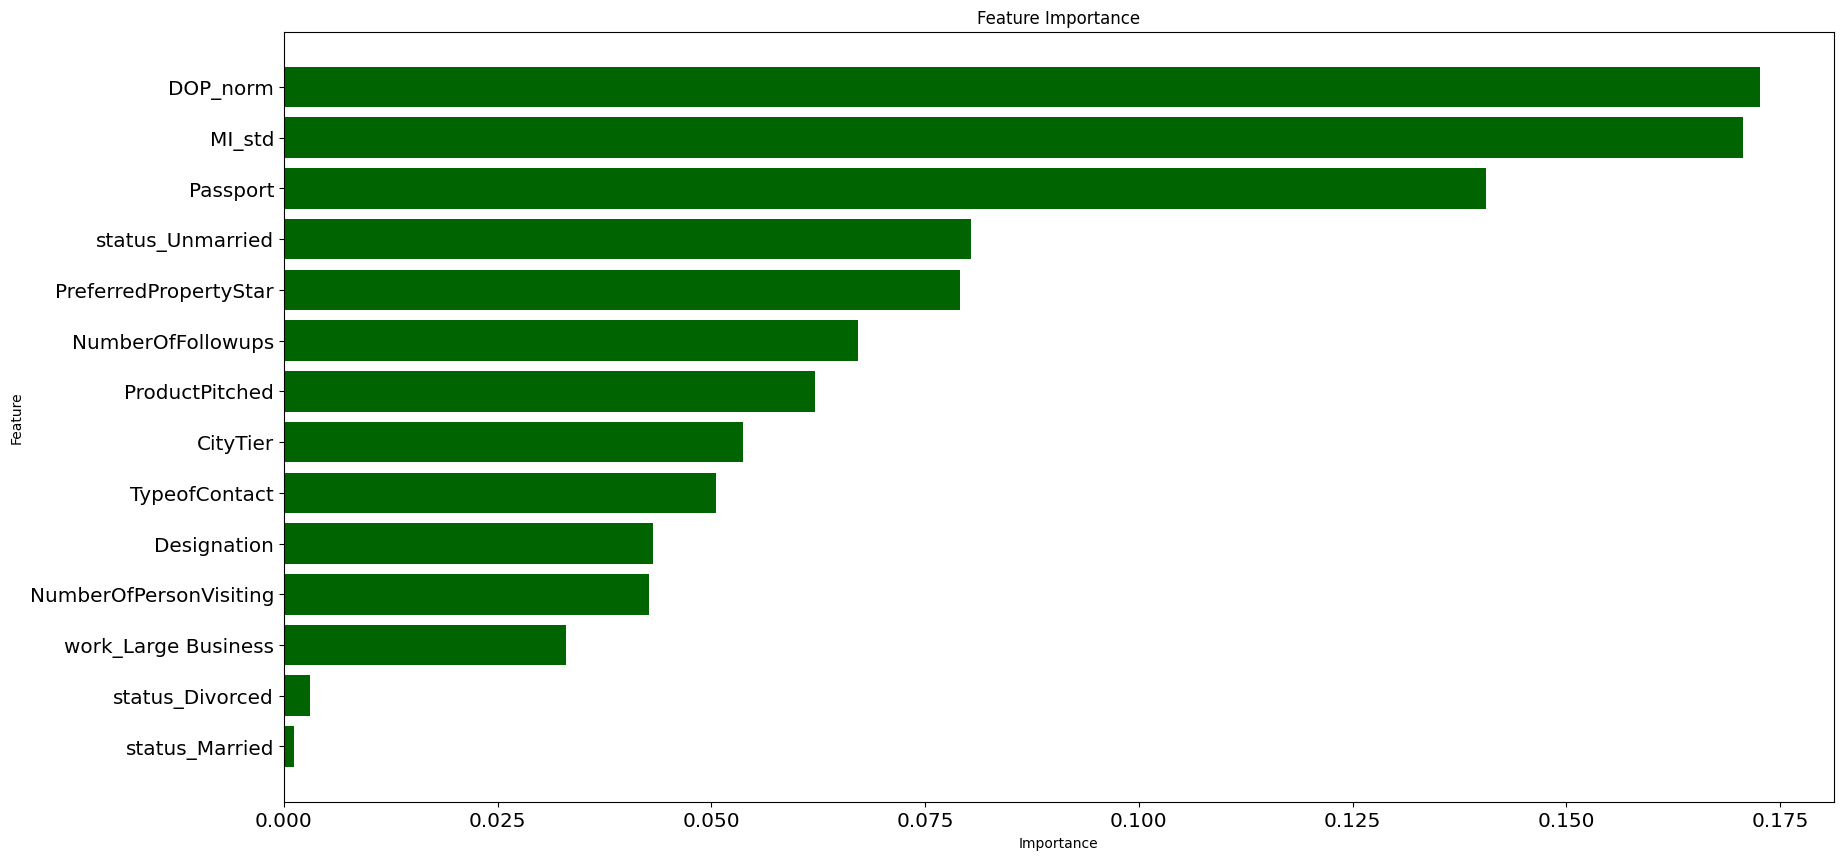

In [ ]:
# Mengambil fitur penting dari model
feature_importance = model.feature_importances_

# Membuat dataframe fitur penting
df_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=True)

# Menampilkan dataframe fitur penting
print(df_feature_importance)

# Plotting fitur penting dalam bentuk grafik batang
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'], color = 'darkgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

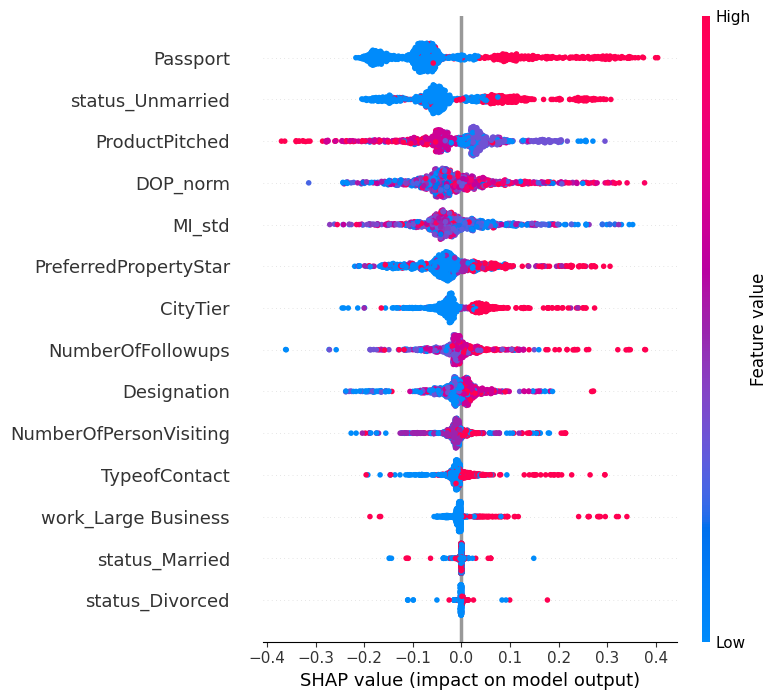

In [ ]:
import shap

# Inisialisasi objek explainer menggunakan model Decision Tree
explainer = shap.TreeExplainer(model_tree)

# Menghitung SHAP values
shap_values = explainer.shap_values(X_test)

# Membuat plot ringkasan SHAP
shap.summary_plot(shap_values[1], X_test)

# Menampilkan plot
plt.show()


# Business Impact

## Marketing Costs

In [ ]:
df_finalized = X_test.copy()
df_finalized.reset_index(drop=True, inplace=True)
df_finalized['ProdTaken'] = y_test.reset_index(drop=True)
df_finalized['ProdTaken_Pred'] = y_pred


In [ ]:
CostperCall = 4.15
cust_before = df_finalized.shape[0]
CostBefore = cust_before*CostperCall
cust_after =  df_finalized[df_finalized['ProdTaken_Pred']==1].shape[0]
CostAfter = cust_after * CostperCall
costDiff = CostBefore - CostAfter
decreasePercent = (costDiff/CostBefore)*100

In [ ]:
print(f'''Without model we aimlessly contact {cust_before} customer, makes the Cost Before Using Model: ${CostBefore:.1f}''')
print(f'''After Using model we just need to contact {cust_after} customer, which makes the Cost After Using Model: ${CostAfter:.1f}''')
print(f'''Differences cost before and after using model : ${costDiff:.1f}, which decrease by {decreasePercent:.2f}%''')

Without model we aimlessly contact 976 customer, makes the Cost Before Using Model: $4050.4
After Using model we just need to contact 192 customer, which makes the Cost After Using Model: $796.8
Differences cost before and after using model : $3253.6, which decrease by 80.33%


## Conversion Rate

In [ ]:
Before = df_finalized.shape[0]
cv_before = df_finalized[df_finalized['ProdTaken'] == 1].shape[0]
percentage_bfr = (cv_before/Before)*100

After = df_finalized[df_finalized['ProdTaken_Pred']==1].shape[0]
cv_after = df_finalized[(df_finalized['ProdTaken']==1)&(df_finalized['ProdTaken_Pred']==1)].shape[0]
percentage_aftr = (cv_after/After)*100

diff_percent = percentage_aftr - percentage_bfr


In [ ]:
print
print(f'''conversion before using model : {cv_before}, with a conversion Rate of {percentage_bfr:.2f}%''')
print(f'''conversion after using model : {cv_after}, with a conversion Rate of {percentage_aftr:.2f}%''')
print(f'''Therefore the conversion rate has increased by {diff_percent:.2f}%''')


conversion before using model : 190, with a conversion Rate of 19.47%
conversion after using model : 134, with a conversion Rate of 69.79%
Therefore the conversion rate has increased by 50.32%


## Application of Convertion Rate on Gross Sales

In [ ]:
customer  = 1000
basic_pack = 100 #Dalam Dollar

cust_convers_before = np.floor((percentage_bfr/100) * customer)
gross_sales_bfr = cust_convers_before*basic_pack

cust_convers_after = np.floor((percentage_aftr/100) * customer)
gross_sales_aftr = cust_convers_after*basic_pack

diff = gross_sales_aftr - gross_sales_bfr

gross_sales_percent = (diff/gross_sales_bfr)*100


In [ ]:
print('Application of Convertion Rate on Gross Sales')
print(f'''we assume that we got the same budget for telemarketing for 1000 customer and the same package price (${basic_pack})''')
print('-------------------------------------------------------------------------------------------------------------\n')
print(f'''Without Modelling\n--------------------\nTotal Customer Conversion: {cust_convers_before}\nGross Sales: ${gross_sales_bfr}\n''')
print(f'''With Modelling\n--------------------\nTotal Customer Conversion: {cust_convers_after}\nGross Sales: ${gross_sales_aftr}\n''')
print(f'''The differences gross sales before and after modelling is ${diff} which has increase up to {gross_sales_percent:.0f}%''')

Application of Convertion Rate on Gross Sales
we assume that we got the same budget for telemarketing for 1000 customer and the same package price ($100)
-------------------------------------------------------------------------------------------------------------

Without Modelling
--------------------
Total Customer Conversion: 194.0
Gross Sales: $19400.0

With Modelling
--------------------
Total Customer Conversion: 697.0
Gross Sales: $69700.0

The differences gross sales before and after modelling is $50300.0 which has increase up to 259%
